In [1]:
EXPERIMENT_NOTEBOOK_PATH = "../../reports/experiments/2019-02-04_01-40/notebook.csv"
EXPERIMENT_LOG_PATH = "../../reports/experiments/2019-02-04_01-40/run_bayesianopt.log"

In [2]:
import os
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

## Load

In [52]:
exp_df = pd.read_csv(EXPERIMENT_NOTEBOOK_PATH)
exp_df.head()

,acc,loss,val_acc,val_loss,trial_no,aug1_type,aug1_magnitude,aug2_type,aug2_magnitude,aug3_type,aug3_magnitude,portion,sample_no,mean_late_val_acc
0,0.110,2.310,0.174,2.288,1,dropout,0.844,invert,0.847,dropout,0.384,0.298,1,0.497
1,0.147,2.279,0.206,2.182,1,dropout,0.844,invert,0.847,dropout,0.384,0.298,1,0.497
2,0.187,2.205,0.322,2.136,1,dropout,0.844,invert,0.847,dropout,0.384,0.298,1,0.497
3,0.224,2.100,0.325,1.866,1,dropout,0.844,invert,0.847,dropout,0.384,0.298,1,0.497
4,0.265,2.020,0.342,1.818,1,dropout,0.844,invert,0.847,dropout,0.384,0.298,1,0.497


## Preprocess

### correct name of reward

In [53]:
exp_df.rename(columns={"mean_late_val_acc":"reward"}, inplace=True)
exp_df.head()

,acc,loss,val_acc,val_loss,trial_no,aug1_type,aug1_magnitude,aug2_type,aug2_magnitude,aug3_type,aug3_magnitude,portion,sample_no,reward
0,0.110,2.310,0.174,2.288,1,dropout,0.844,invert,0.847,dropout,0.384,0.298,1,0.497
1,0.147,2.279,0.206,2.182,1,dropout,0.844,invert,0.847,dropout,0.384,0.298,1,0.497
2,0.187,2.205,0.322,2.136,1,dropout,0.844,invert,0.847,dropout,0.384,0.298,1,0.497
3,0.224,2.100,0.325,1.866,1,dropout,0.844,invert,0.847,dropout,0.384,0.298,1,0.497
4,0.265,2.020,0.342,1.818,1,dropout,0.844,invert,0.847,dropout,0.384,0.298,1,0.497


### add epoch info

In [102]:
n_epochs = len(exp_df) / len(exp_df["trial_no"].unique()) / len(exp_df["sample_no"].unique())

exp_df["epoch"] = exp_df.index % n_epochs

exp_df.head()

,acc,loss,val_acc,val_loss,trial_no,aug1_type,aug1_magnitude,aug2_type,aug2_magnitude,aug3_type,aug3_magnitude,portion,sample_no,reward,acc_overfit,epoch
0,0.110,2.310,0.174,2.288,1,dropout,0.844,invert,0.847,dropout,0.384,0.298,1,0.497,-0.064,0.0
1,0.147,2.279,0.206,2.182,1,dropout,0.844,invert,0.847,dropout,0.384,0.298,1,0.497,-0.059,1.0
2,0.187,2.205,0.322,2.136,1,dropout,0.844,invert,0.847,dropout,0.384,0.298,1,0.497,-0.135,2.0
3,0.224,2.100,0.325,1.866,1,dropout,0.844,invert,0.847,dropout,0.384,0.298,1,0.497,-0.101,3.0
4,0.265,2.020,0.342,1.818,1,dropout,0.844,invert,0.847,dropout,0.384,0.298,1,0.497,-0.077,4.0


In [103]:
color_palette = ["red","blue","chocolate","salmon","green","pink","orange",
                 "purple","magenta","sienna","teal","khaki","yellow","darkgreen",
                 "darkblue", "cyan","tan","yellowgreen","tomato","olive",
                 "navy","ivory","brown","azure", '#e6194b', '#3cb44b', '#ffe119', '#4363d8', 
                 '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', 
                 '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', 
                 '#000075', '#808080', '#ffffff', '#000000']*10

def plot_exp_lines(exp_df):
    
    #plt.figure(figsize=(20,10))
    
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10,15))
    fig.tight_layout(pad=0.4, w_pad=0.5, h_pad=0.0)
    
    rowList = []
    for trial_no in exp_df["trial_no"].unique():
        
        if trial_no<1:
            continue
        
        iter_df = exp_df[exp_df["trial_no"]==trial_no].copy()
        
        exp_color = color_palette[trial_no]
        
        if exp_df[exp_df["trial_no"]==trial_no]["portion"].values[0]==0.0:
            exp_color="black"
        
        mean_last_scores = []
        
        ############################################################
        # Accuracy plot
        ############################################################
        for sample_id in iter_df["sample_no"].unique():
            sample_df = iter_df[iter_df["sample_no"]==sample_id].copy()
            xs = np.arange(1,51,1)
            axes[0].plot(xs, sample_df["val_acc"], color=exp_color, alpha=0.5, linewidth=2)
            axes[0].plot(xs, sample_df["acc"], '--',color=exp_color, alpha=0.5, linewidth=1)
            
        axes[0].set_title("validation (straight) and train (dashed) accuracies for child model\n"+\
                  "(each color represents a distinct augmentation strategy) ", fontsize=20)
        axes[0].set_ylabel("accuracy", fontsize=20)
        
        ############################################################
        # Loss plot
        ############################################################
        for sample_id in iter_df["sample_no"].unique():
            sample_df = iter_df[iter_df["sample_no"]==sample_id].copy()
            xs = np.arange(1,51,1)
            axes[1].plot(xs, sample_df["val_loss"], color=exp_color, alpha=0.5, linewidth=2)
            axes[1].plot(xs, sample_df["loss"], '--',color=exp_color, alpha=0.5, linewidth=1)
            
        #axes[1].title("validation (straight) and train (dashed) accuracies for child model\n"+\
        #          "(each color represents a distinct augmentation strategy) ", fontsize=20)
        axes[1].set_xlabel("epochs", fontsize=20)
        axes[1].set_ylabel("loss", fontsize=20)
            
        param1 = iter_df["aug1_type"].values[0]
        param2 = iter_df["aug1_magnitude"].values[0]
        param3 = iter_df["aug2_type"].values[0]
        param4 = iter_df["aug2_magnitude"].values[0]
        param5 = iter_df["aug3_type"].values[0]
        param6 = iter_df["aug3_magnitude"].values[0]
        portion = iter_df["portion"].values[0]
        reward = iter_df["reward"].values[0]
        
        rowList.append([trial_no,param1,param2,param3,param4,param5,param6,portion,reward])
        
    ret_df = pd.DataFrame(rowList, columns=[
        "trial_no","aug1_type","aug1_magnitude", "aug2_type","aug2_magnitude","aug3_type","aug3_magnitude","portion", "reward"]) 
    return ret_df.sort_values("reward", ascending=False)

Total number of trials: 40


,trial_no,aug1_type,aug1_magnitude,aug2_type,aug2_magnitude,aug3_type,aug3_magnitude,portion,reward
32,33,crop,0.978,fog,0.603,sharpen,0.902,0.982,0.554
27,28,gaussian-blur,0.980,crop,0.379,brighten,0.916,0.980,0.548
25,26,translate-y,0.942,rotate,0.089,translate-y,0.970,0.979,0.546
24,25,crop,0.999,translate-y,0.068,sharpen,0.946,0.996,0.541
39,40,crop,0.981,clouds,0.792,shear,0.574,0.973,0.539
28,29,invert,0.984,translate-y,0.374,shear,0.793,0.980,0.539
17,18,gamma-contrast,0.927,coarse-dropout,0.554,translate-x,0.978,0.971,0.535
10,11,clouds,0.978,coarse-dropout,0.907,rotate,0.960,0.646,0.534
35,36,shear,0.984,gamma-contrast,0.682,brighten,0.852,0.970,0.533
33,34,emboss,0.986,clouds,0.583,sharpen,0.513,0.981,0.529


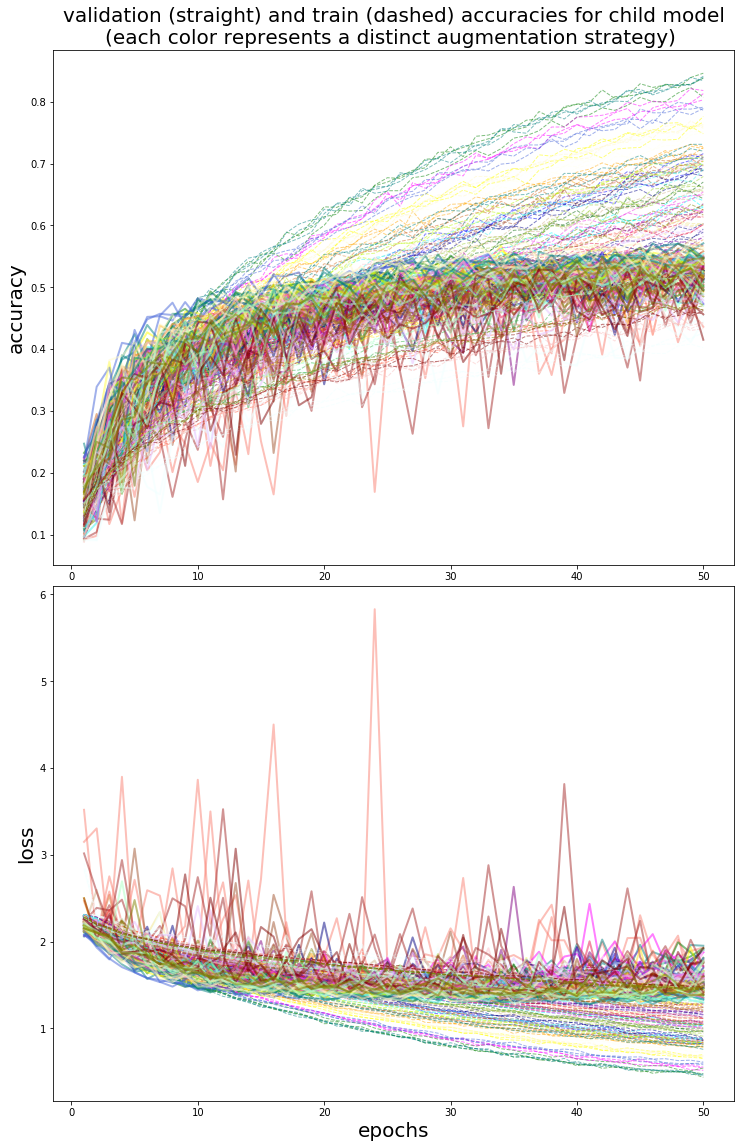

In [104]:
score_df = plot_exp_lines(exp_df)
print (f"Total number of trials: {exp_df.trial_no.unique().__len__()}")
score_df[:10]

## Rewards are increasing by iteration. Good news!

Text(-0.6493331481731968, 0.4510316130287898, 'pearson r:0.45, p:2.2e-07')

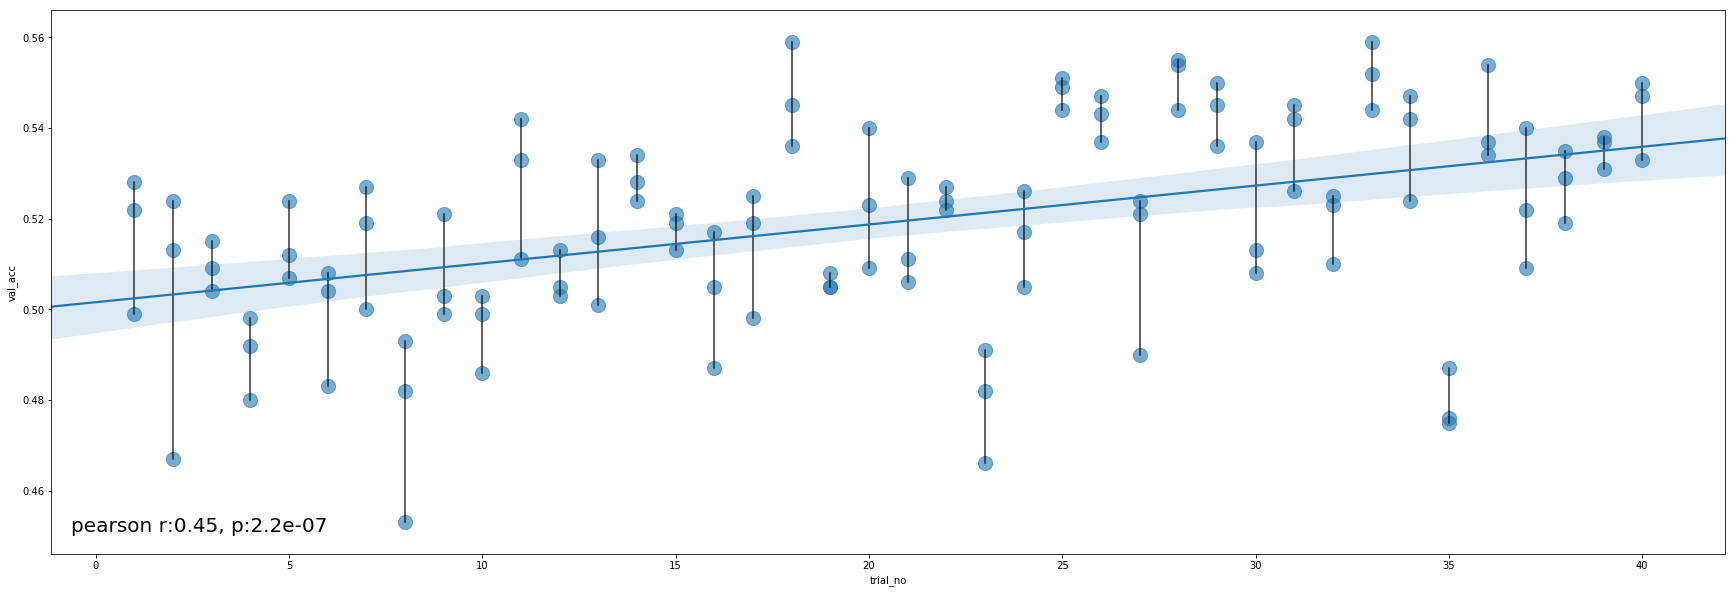

In [226]:
import seaborn as sns

df = (exp_df[exp_df["acc_overfit"]<0.05]
     .sort_values("val_acc", ascending=False)
     .drop_duplicates(["trial_no","sample_no"])
)[["trial_no","val_acc"]]

plt.figure(figsize=(30,10))
for trial_no in df["trial_no"].unique():
    val_accs = df[df["trial_no"]==trial_no]["val_acc"].values
    plt.plot([trial_no, trial_no],[min(val_accs), max(val_accs)], color='black', alpha=0.8)

ax = sns.regplot(x="trial_no", y="val_acc", data=df, scatter_kws={'s':200,'alpha':0.6})

from scipy.stats import pearsonr
r , p = pearsonr(df["trial_no"].values,df["val_acc"].values)

plt.text(plt.xlim()[0]+0.5,plt.ylim()[0]+0.005, f"pearson r={r:.2}, p:{p:.2}", fontsize=20)

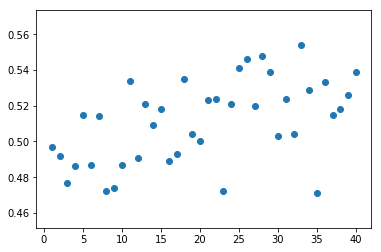

In [155]:
plt.scatter(score_df["trial_no"],score_df["reward"])

# Top 5 policy accuracy curves

,trial_no,aug1_type,aug1_magnitude,aug2_type,aug2_magnitude,aug3_type,aug3_magnitude,portion,reward
3,33,crop,0.978,fog,0.603,sharpen,0.902,0.982,0.554
2,28,gaussian-blur,0.980,crop,0.379,brighten,0.916,0.980,0.548
1,26,translate-y,0.942,rotate,0.089,translate-y,0.970,0.979,0.546
0,25,crop,0.999,translate-y,0.068,sharpen,0.946,0.996,0.541
4,40,crop,0.981,clouds,0.792,shear,0.574,0.973,0.539


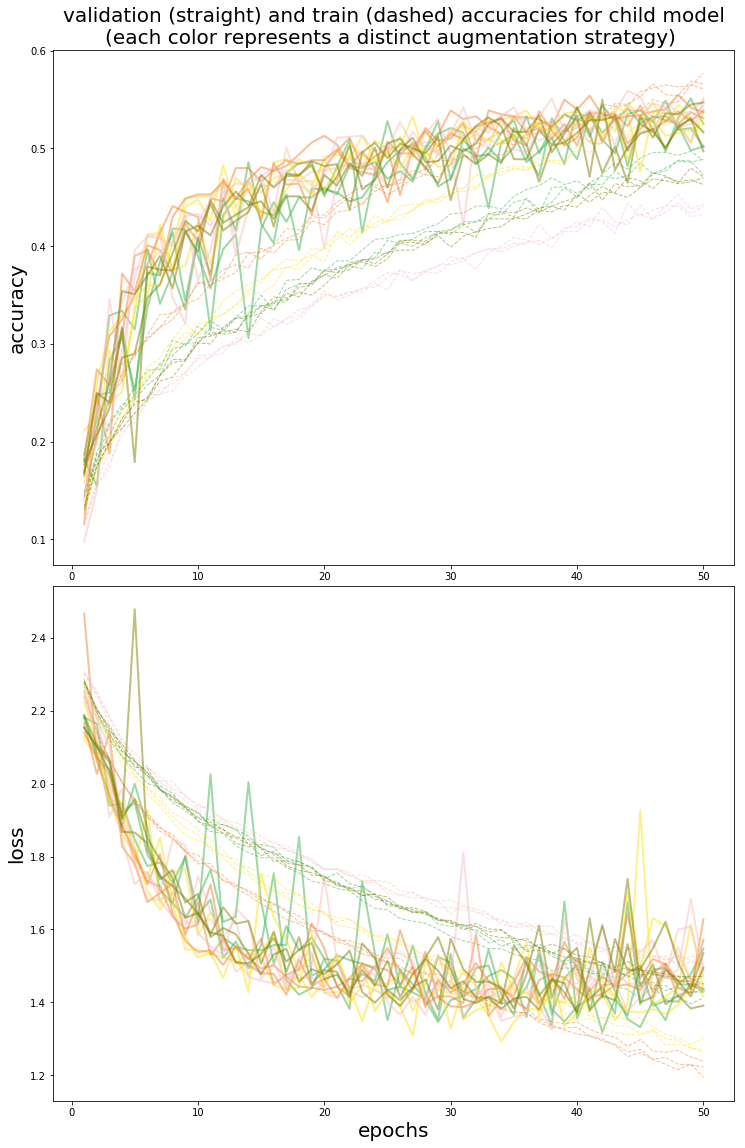

In [106]:
top_policy_trial_no_arr = score_df[:5].trial_no.values
plot_exp_lines(exp_df[exp_df["trial_no"].isin(top_policy_trial_no_arr)])

# Bottom 5 policy accuracy curves

,trial_no,aug1_type,aug1_magnitude,aug2_type,aug2_magnitude,aug3_type,aug3_magnitude,portion,reward
0,3,translate-y,0.648,translate-y,0.957,rotate,0.870,0.474,0.477
2,9,dropout,0.414,emboss,0.624,translate-y,0.675,0.317,0.474
1,8,translate-y,0.038,coarse-dropout,0.959,coarse-dropout,0.635,0.995,0.472
3,23,gamma-contrast,0.932,gaussian-blur,0.557,translate-y,0.876,0.966,0.472
4,35,additive-gaussian-noise,0.991,coarse-dropout,0.597,sharpen,0.633,0.998,0.471


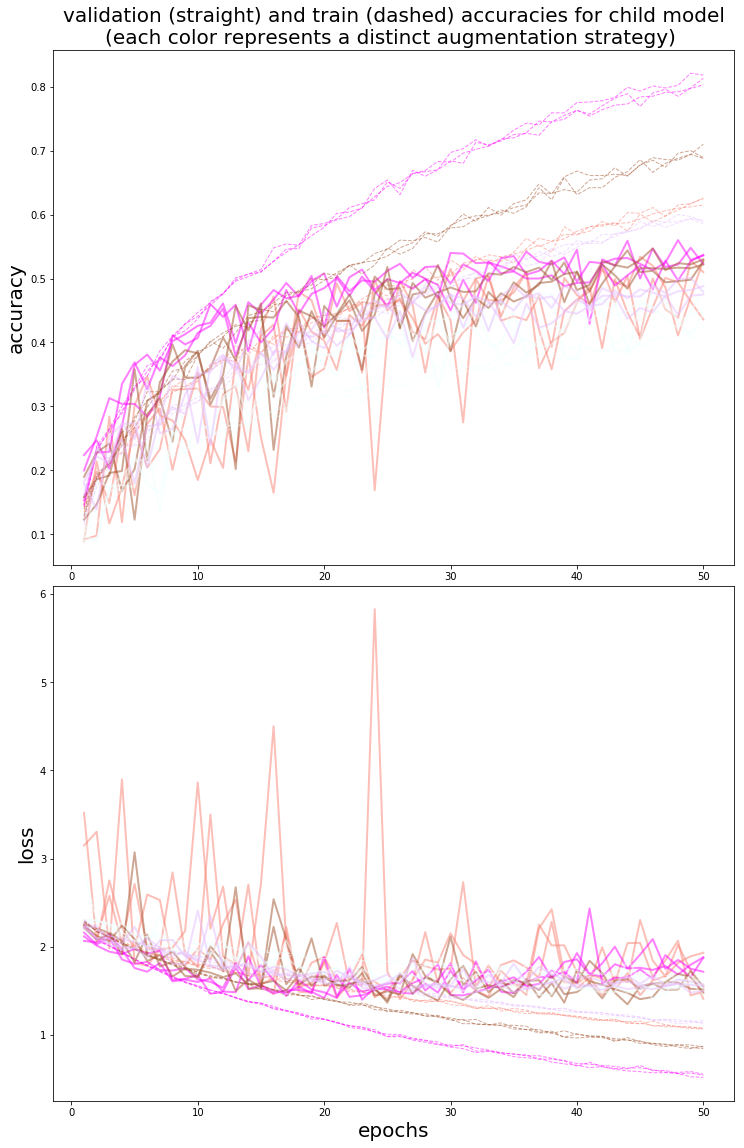

In [107]:
worst_policy_trial_no_arr = score_df[-5:].trial_no.values
plot_exp_lines(exp_df[exp_df["trial_no"].isin(worst_policy_trial_no_arr)])

## How proportion of augmented images affect accuracy?

In [108]:
import sys
sys.path.insert(0,"../../")

from deepaugmenter.augmenter import Augmenter
augmenter=Augmenter()

In [109]:
from PIL import Image

from imgaug import augmenters as iaa

import sys
sys.path.insert(0,"../../")
from deepaugmenter.build_features import DataOp

In [110]:
data, input_shape = DataOp.load("cifar10",1000,100)
data = DataOp.preprocess(data)

In [144]:
def display_images(X, nrows=2, ncols=4):
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*10,nrows*10))
    fig.tight_layout()

    for i,im_arr in enumerate(X[:(nrows*ncols)]):
        axes[int(i/ncols)][i%ncols].imshow(im_arr)
        
def display_images_comperatively(X,X_aug,nrows=2, ncols=4):
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*10,nrows*10))
    fig.tight_layout()

    for i,im_arr in enumerate(X[:(nrows*ncols)]):
        if i%2==0:
            axes[int(i/ncols)][i%ncols].imshow(X[i])
            axes[int((i+1)/ncols)][(i+1)%ncols].imshow(X_aug[i])

            
def display_augmentation_by_trial_no(trial_no, exp_df, data, nrows=2, ncols=4):
    trial_df = exp_df[exp_df["trial_no"]==trial_no]
    trial_hyperparams = [trial_df.iloc[0,5],trial_df.iloc[0,6],
                         trial_df.iloc[0,7],trial_df.iloc[0,8],
                         trial_df.iloc[0,9],trial_df.iloc[0,10],
                         1.0] # proportion always 1

    aug_data = augmenter.run(data["X_train"], data["y_train"],*trial_hyperparams)

    print (trial_hyperparams)
    display_images_comperatively(data["X_train"], aug_data["X_train"], nrows, ncols)

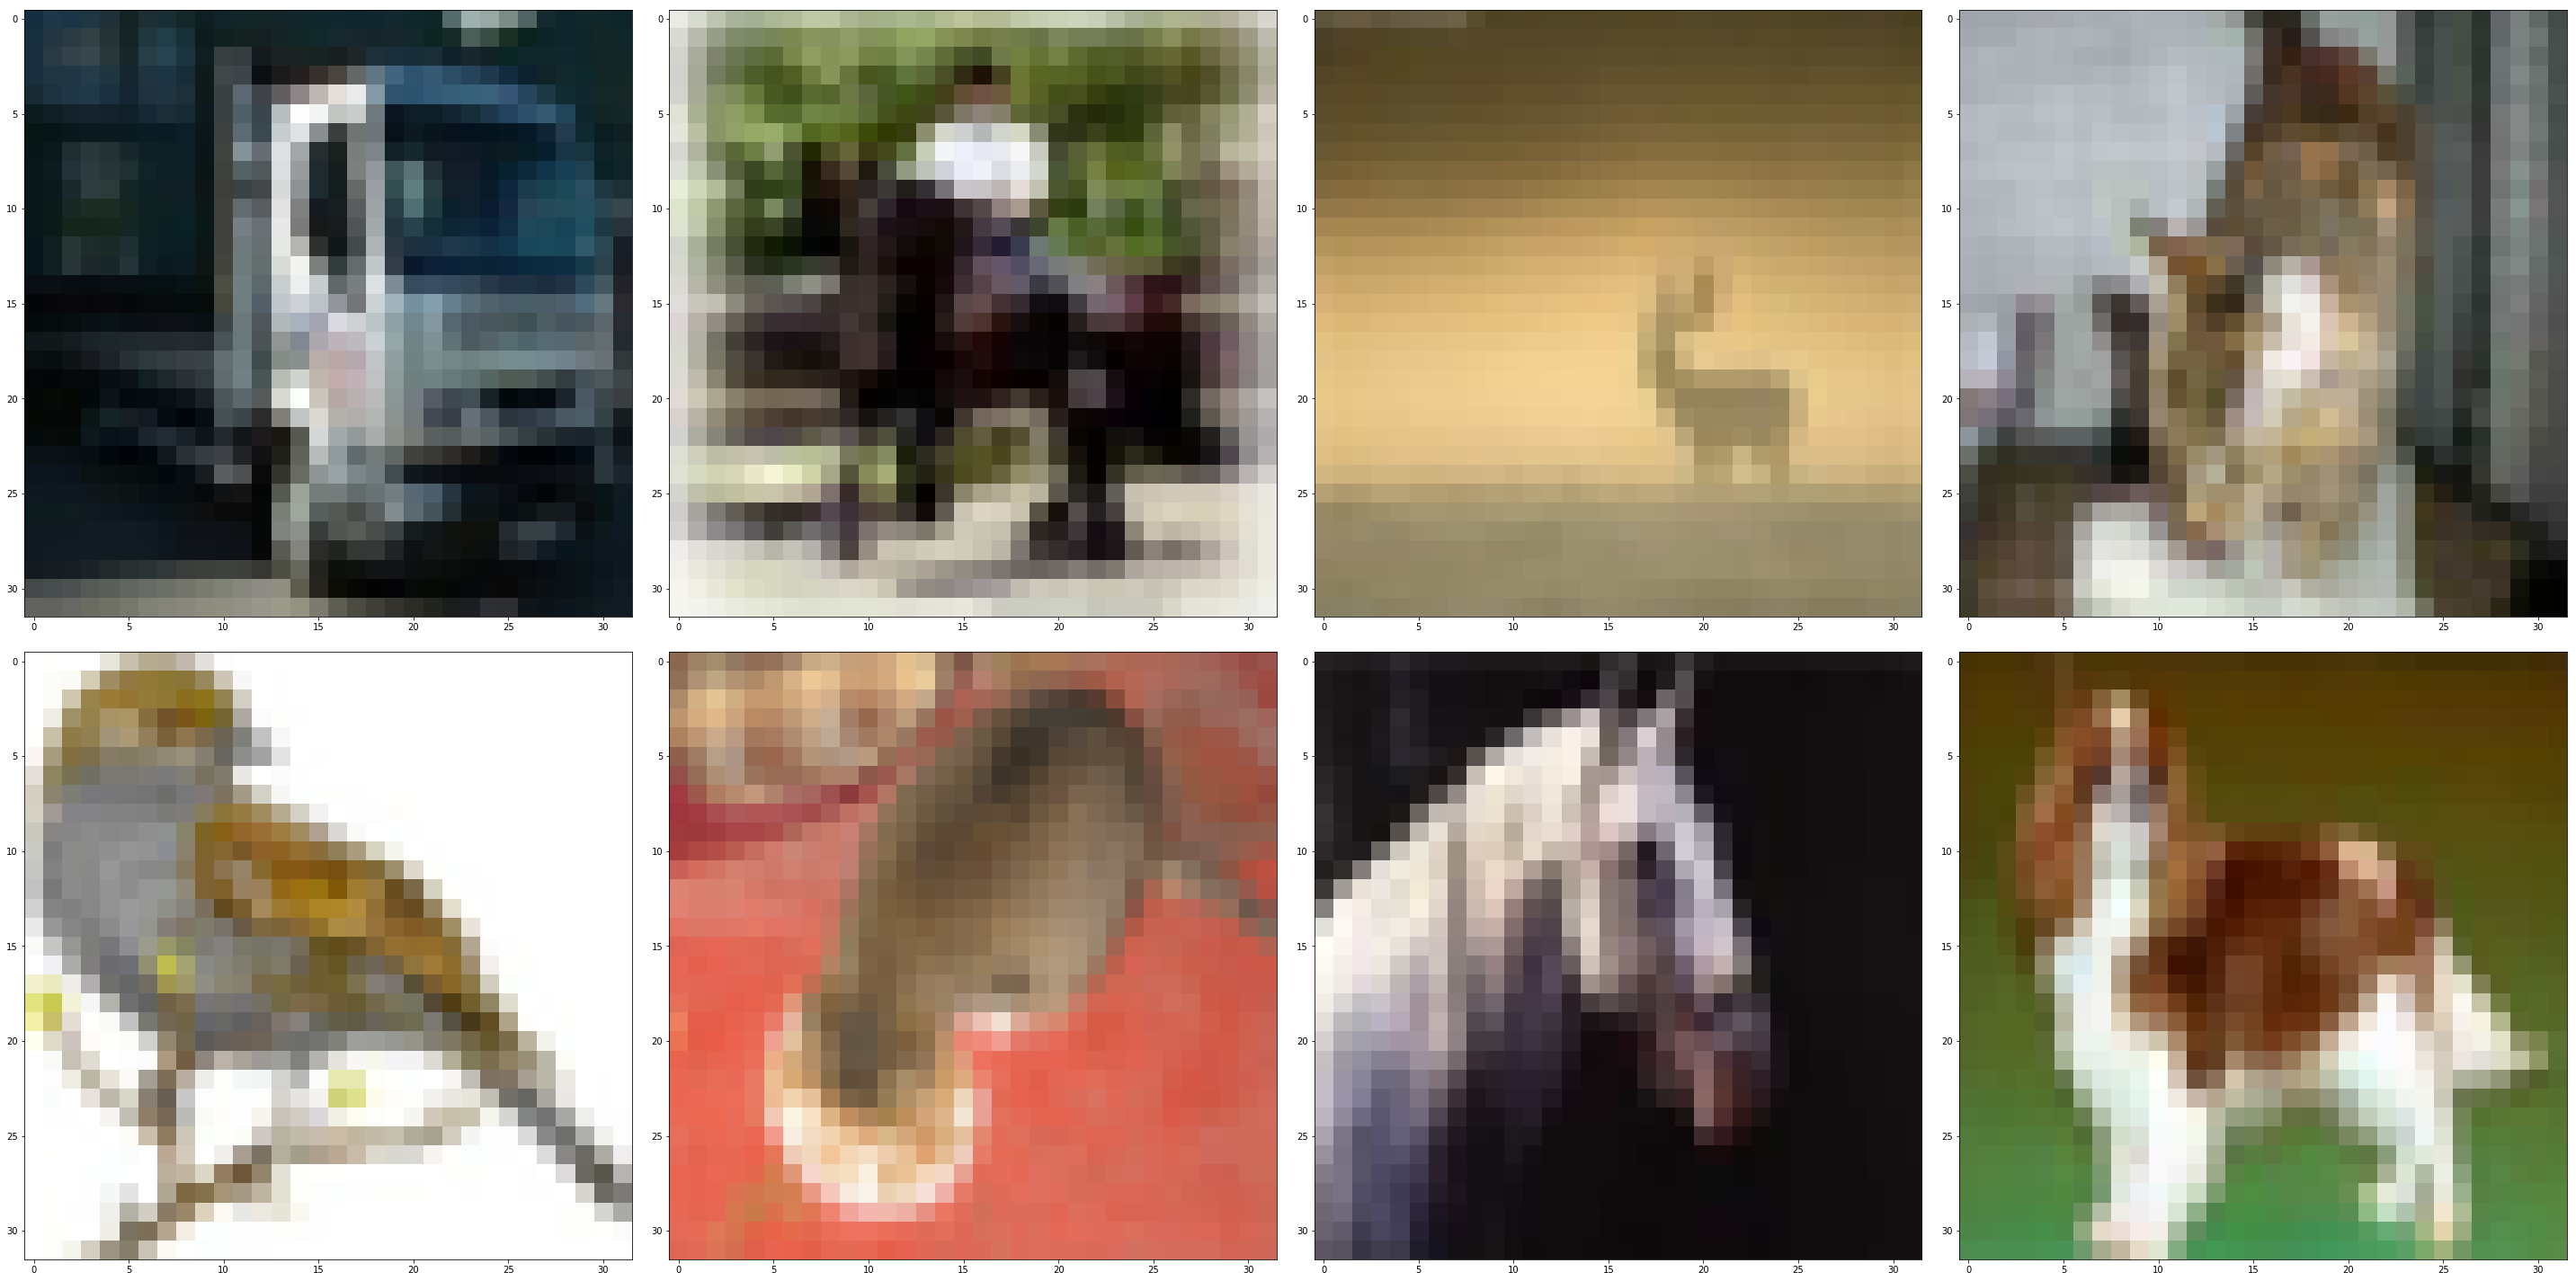

In [112]:
display_images(data["X_train"])

['gaussian-blur', 0.474, 'rotate', 0.737, 'shear', 0.135, 1.0]


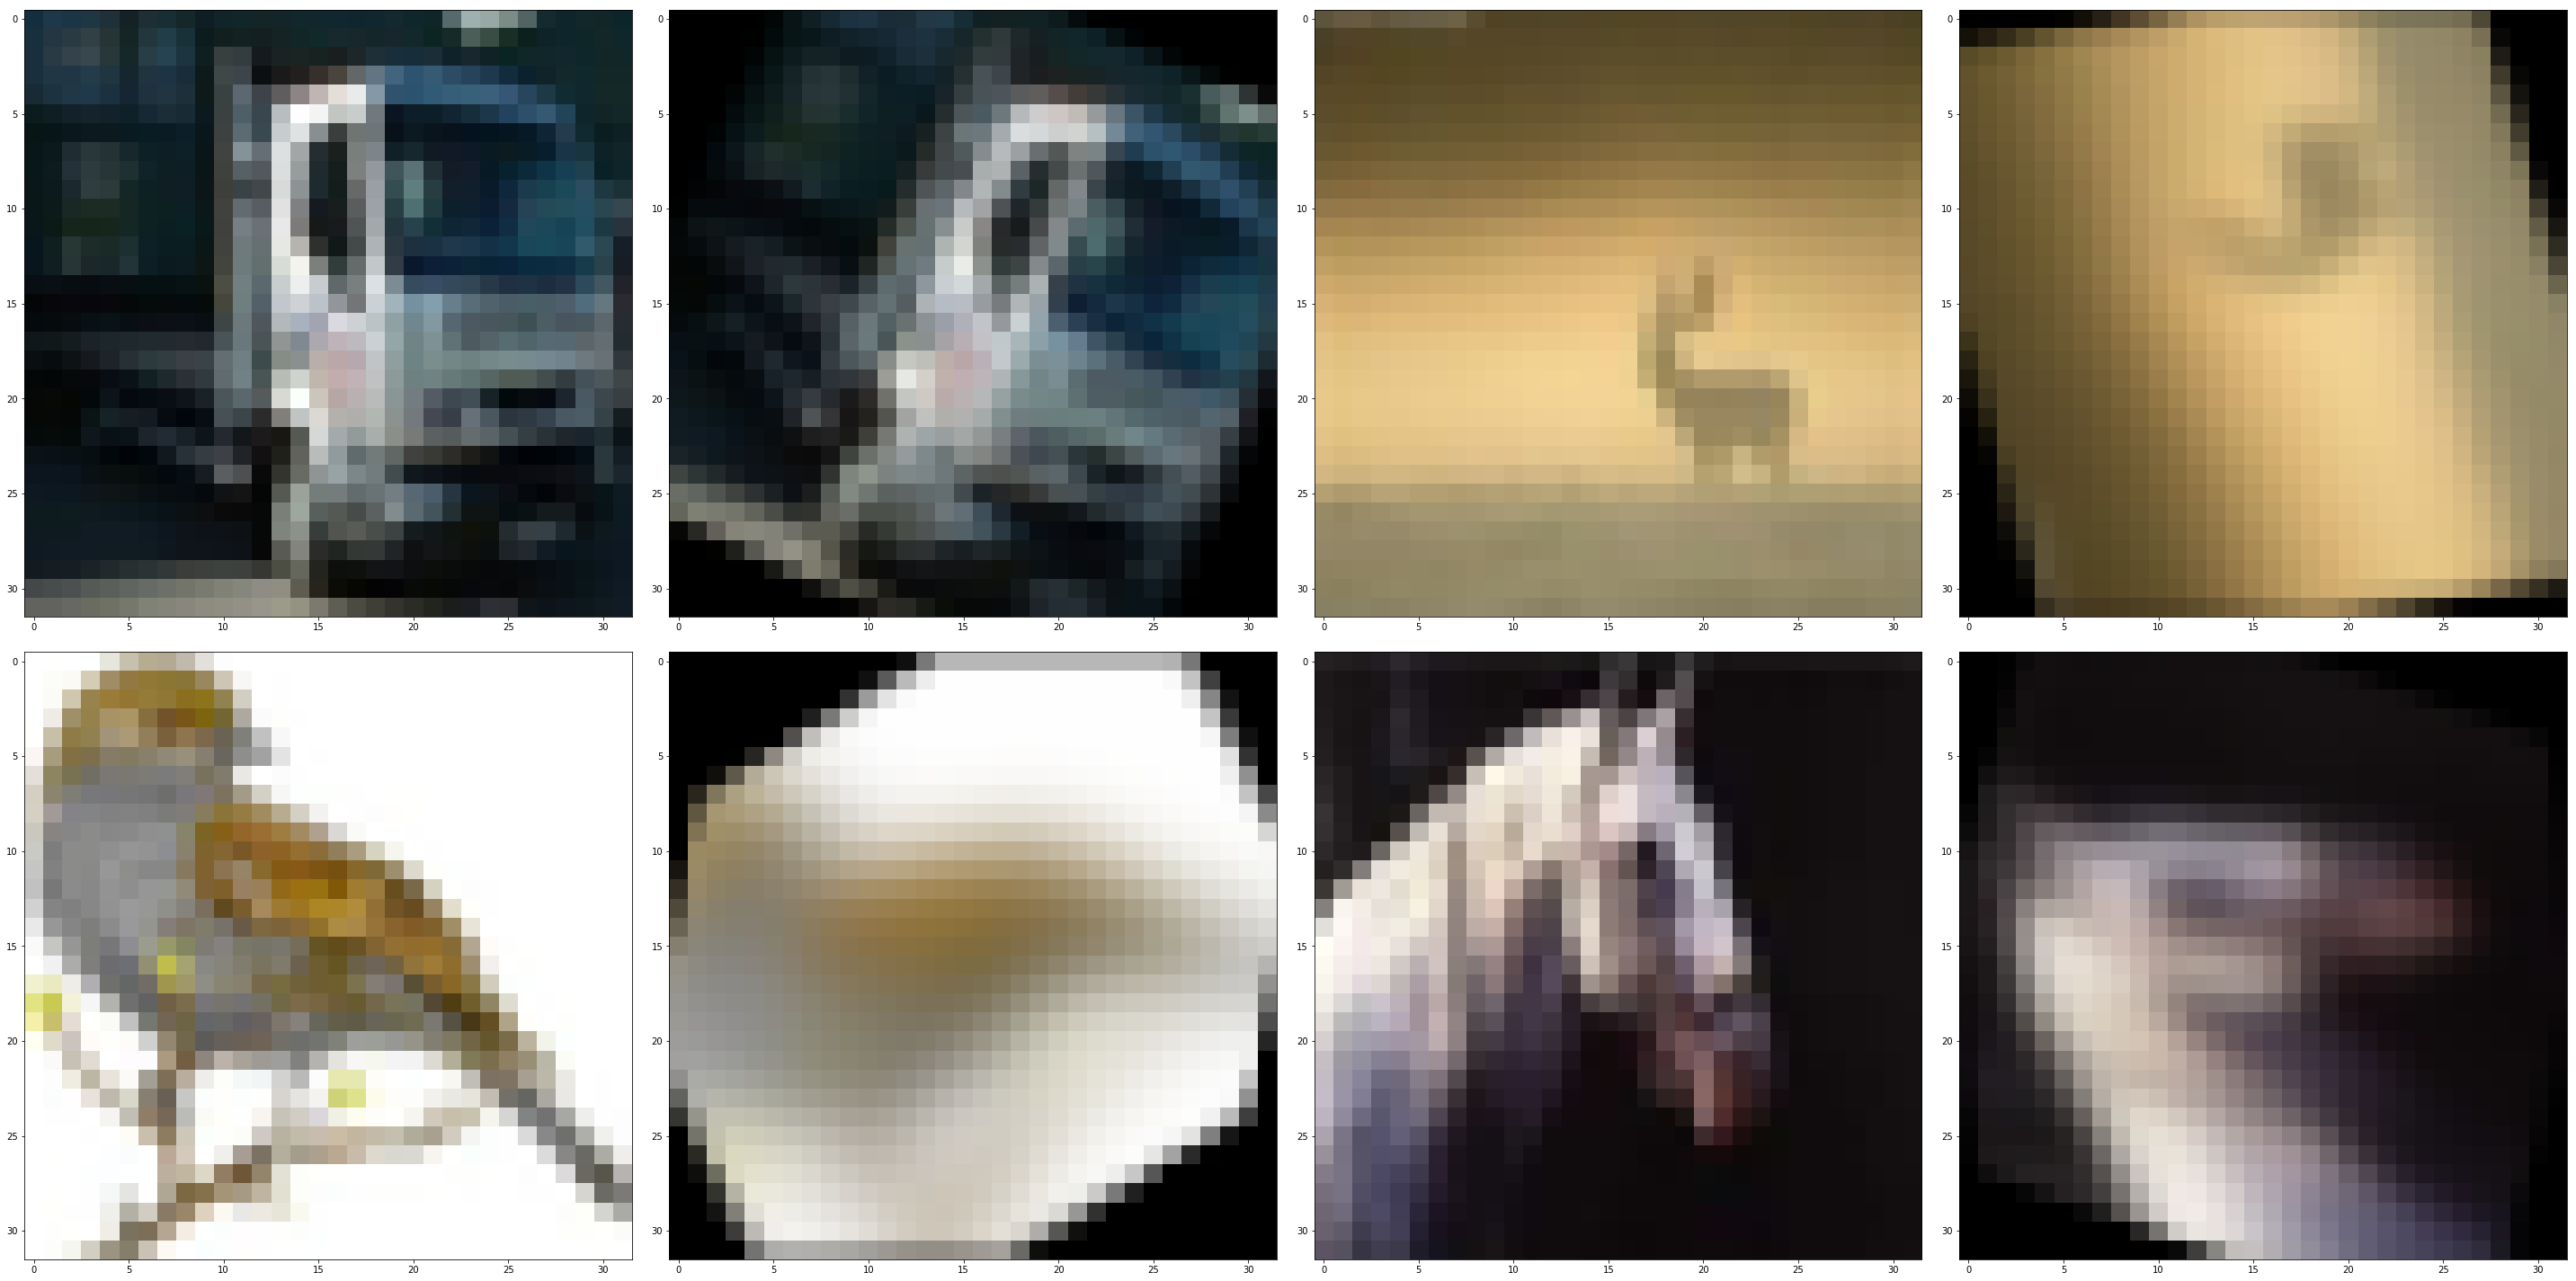

In [113]:
display_augmentation_by_trial_no(5, exp_df, data)

In [114]:
top_policy_trial_no_arr

array([33, 28, 26, 25, 40])

# Overfitting augmentations

33
['crop', 0.978, 'fog', 0.603, 'sharpen', 0.902, 1.0]
28
['gaussian-blur', 0.98, 'crop', 0.379, 'brighten', 0.9159999999999999, 1.0]
26
['translate-y', 0.9420000000000001, 'rotate', 0.08900000000000001, 'translate-y', 0.97, 1.0]
25
['crop', 0.9990000000000001, 'translate-y', 0.068, 'sharpen', 0.946, 1.0]
40
['crop', 0.981, 'clouds', 0.792, 'shear', 0.574, 1.0]


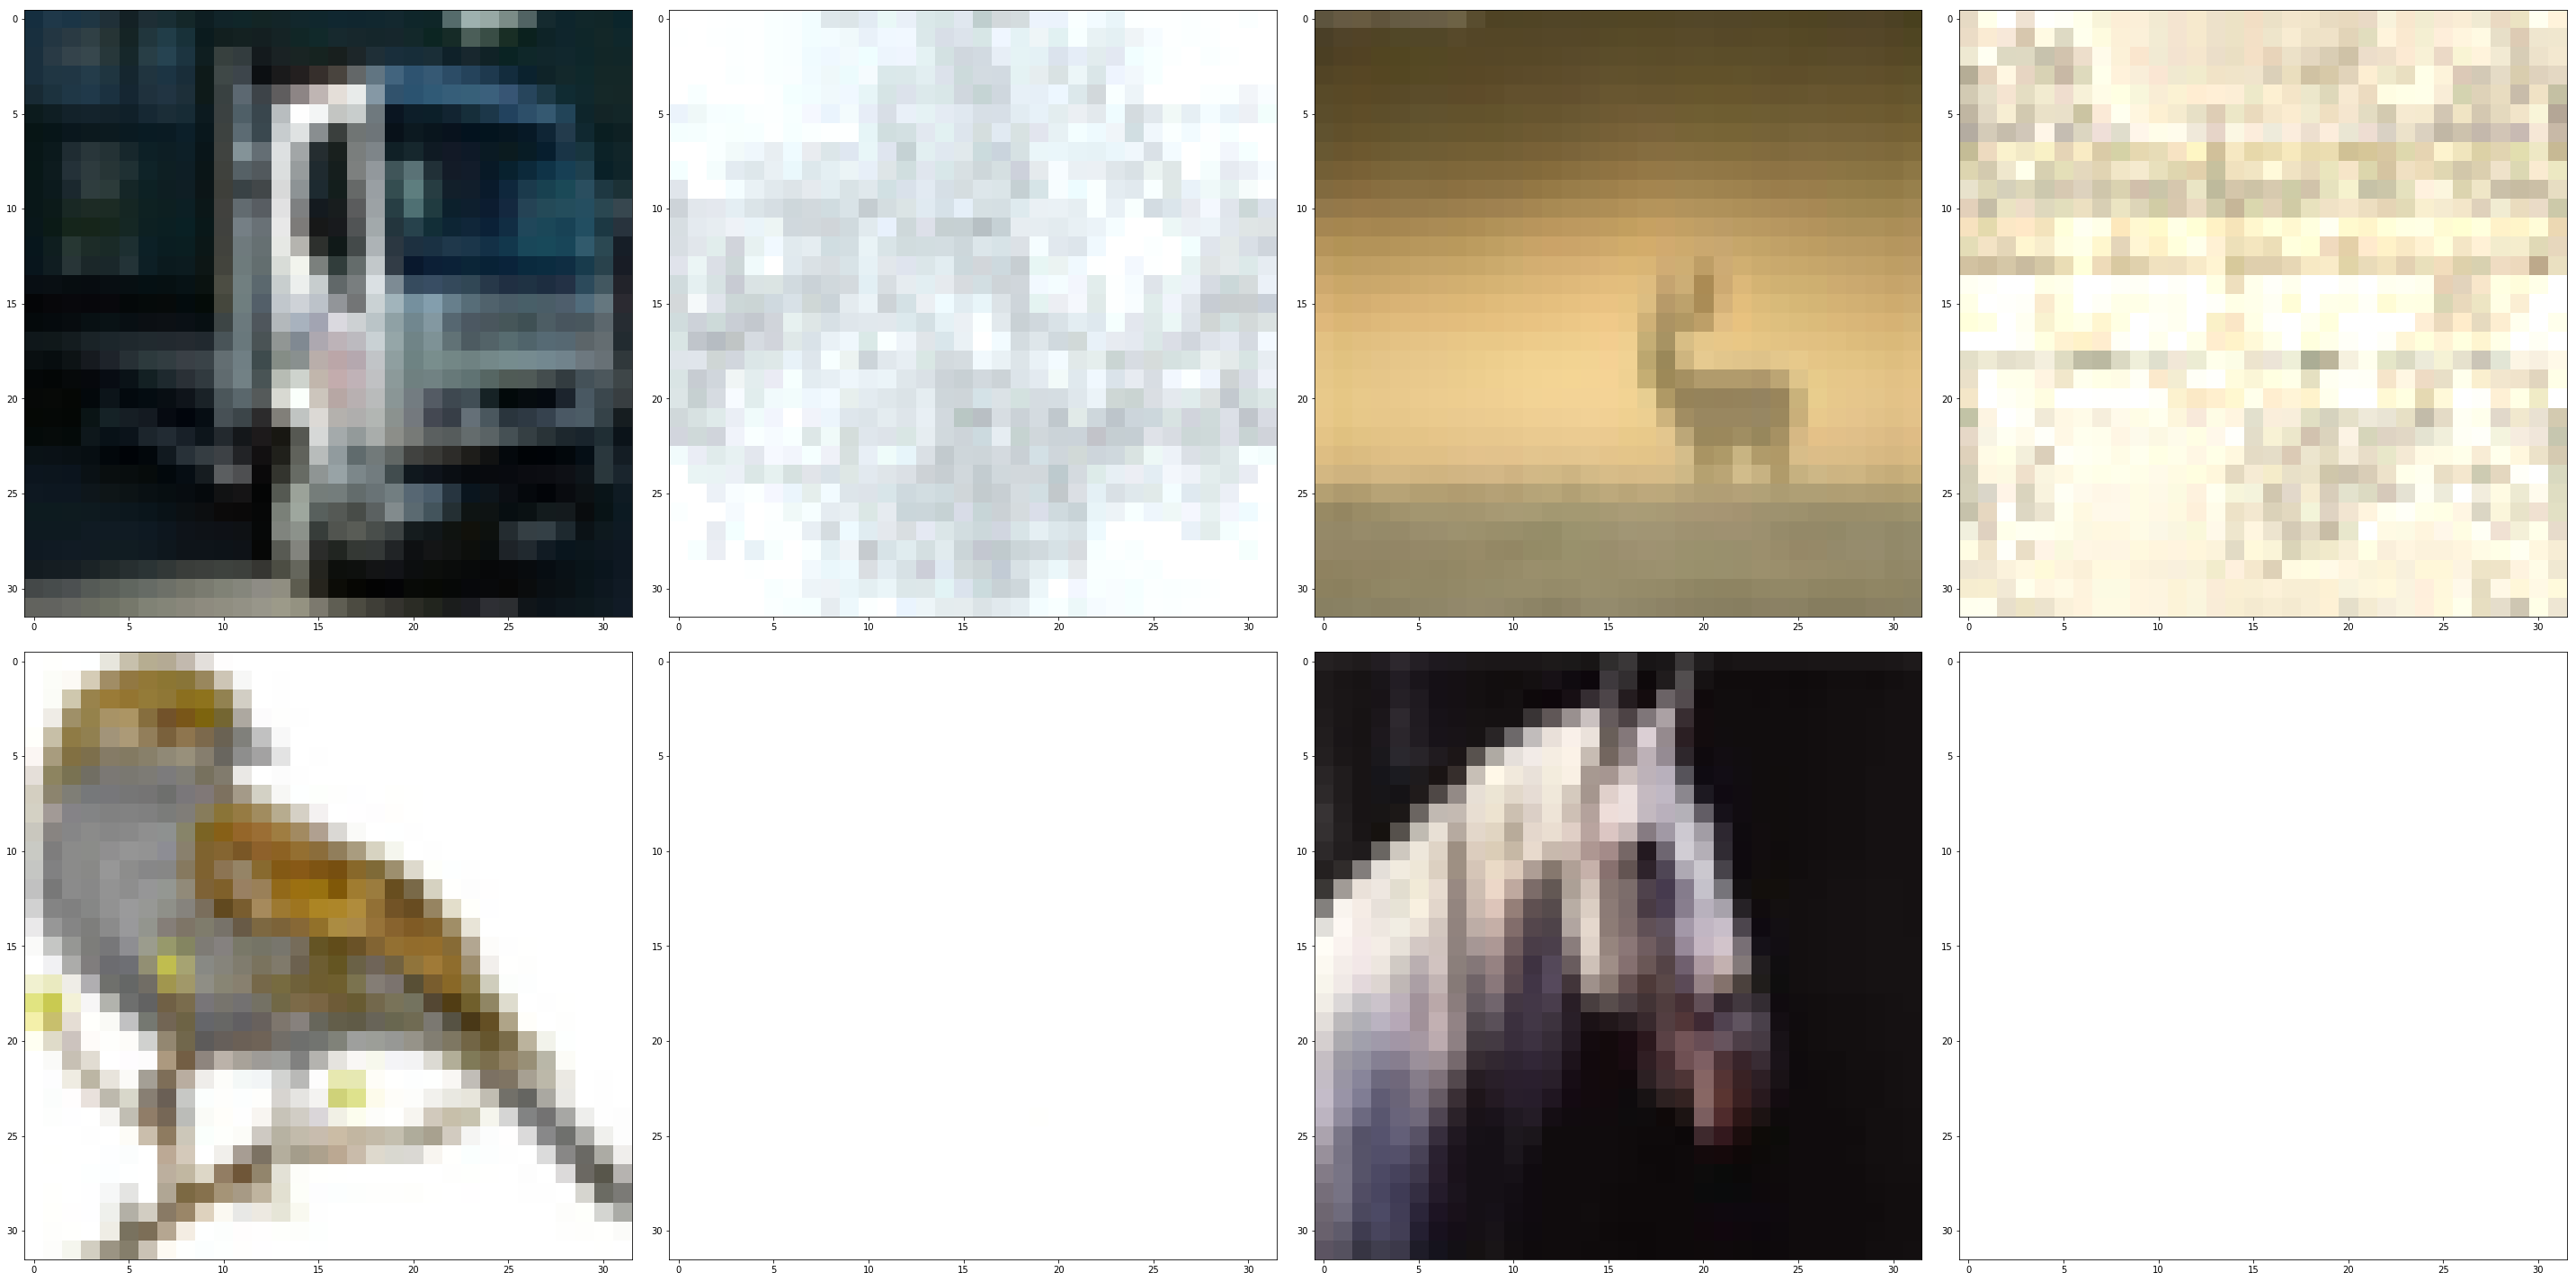

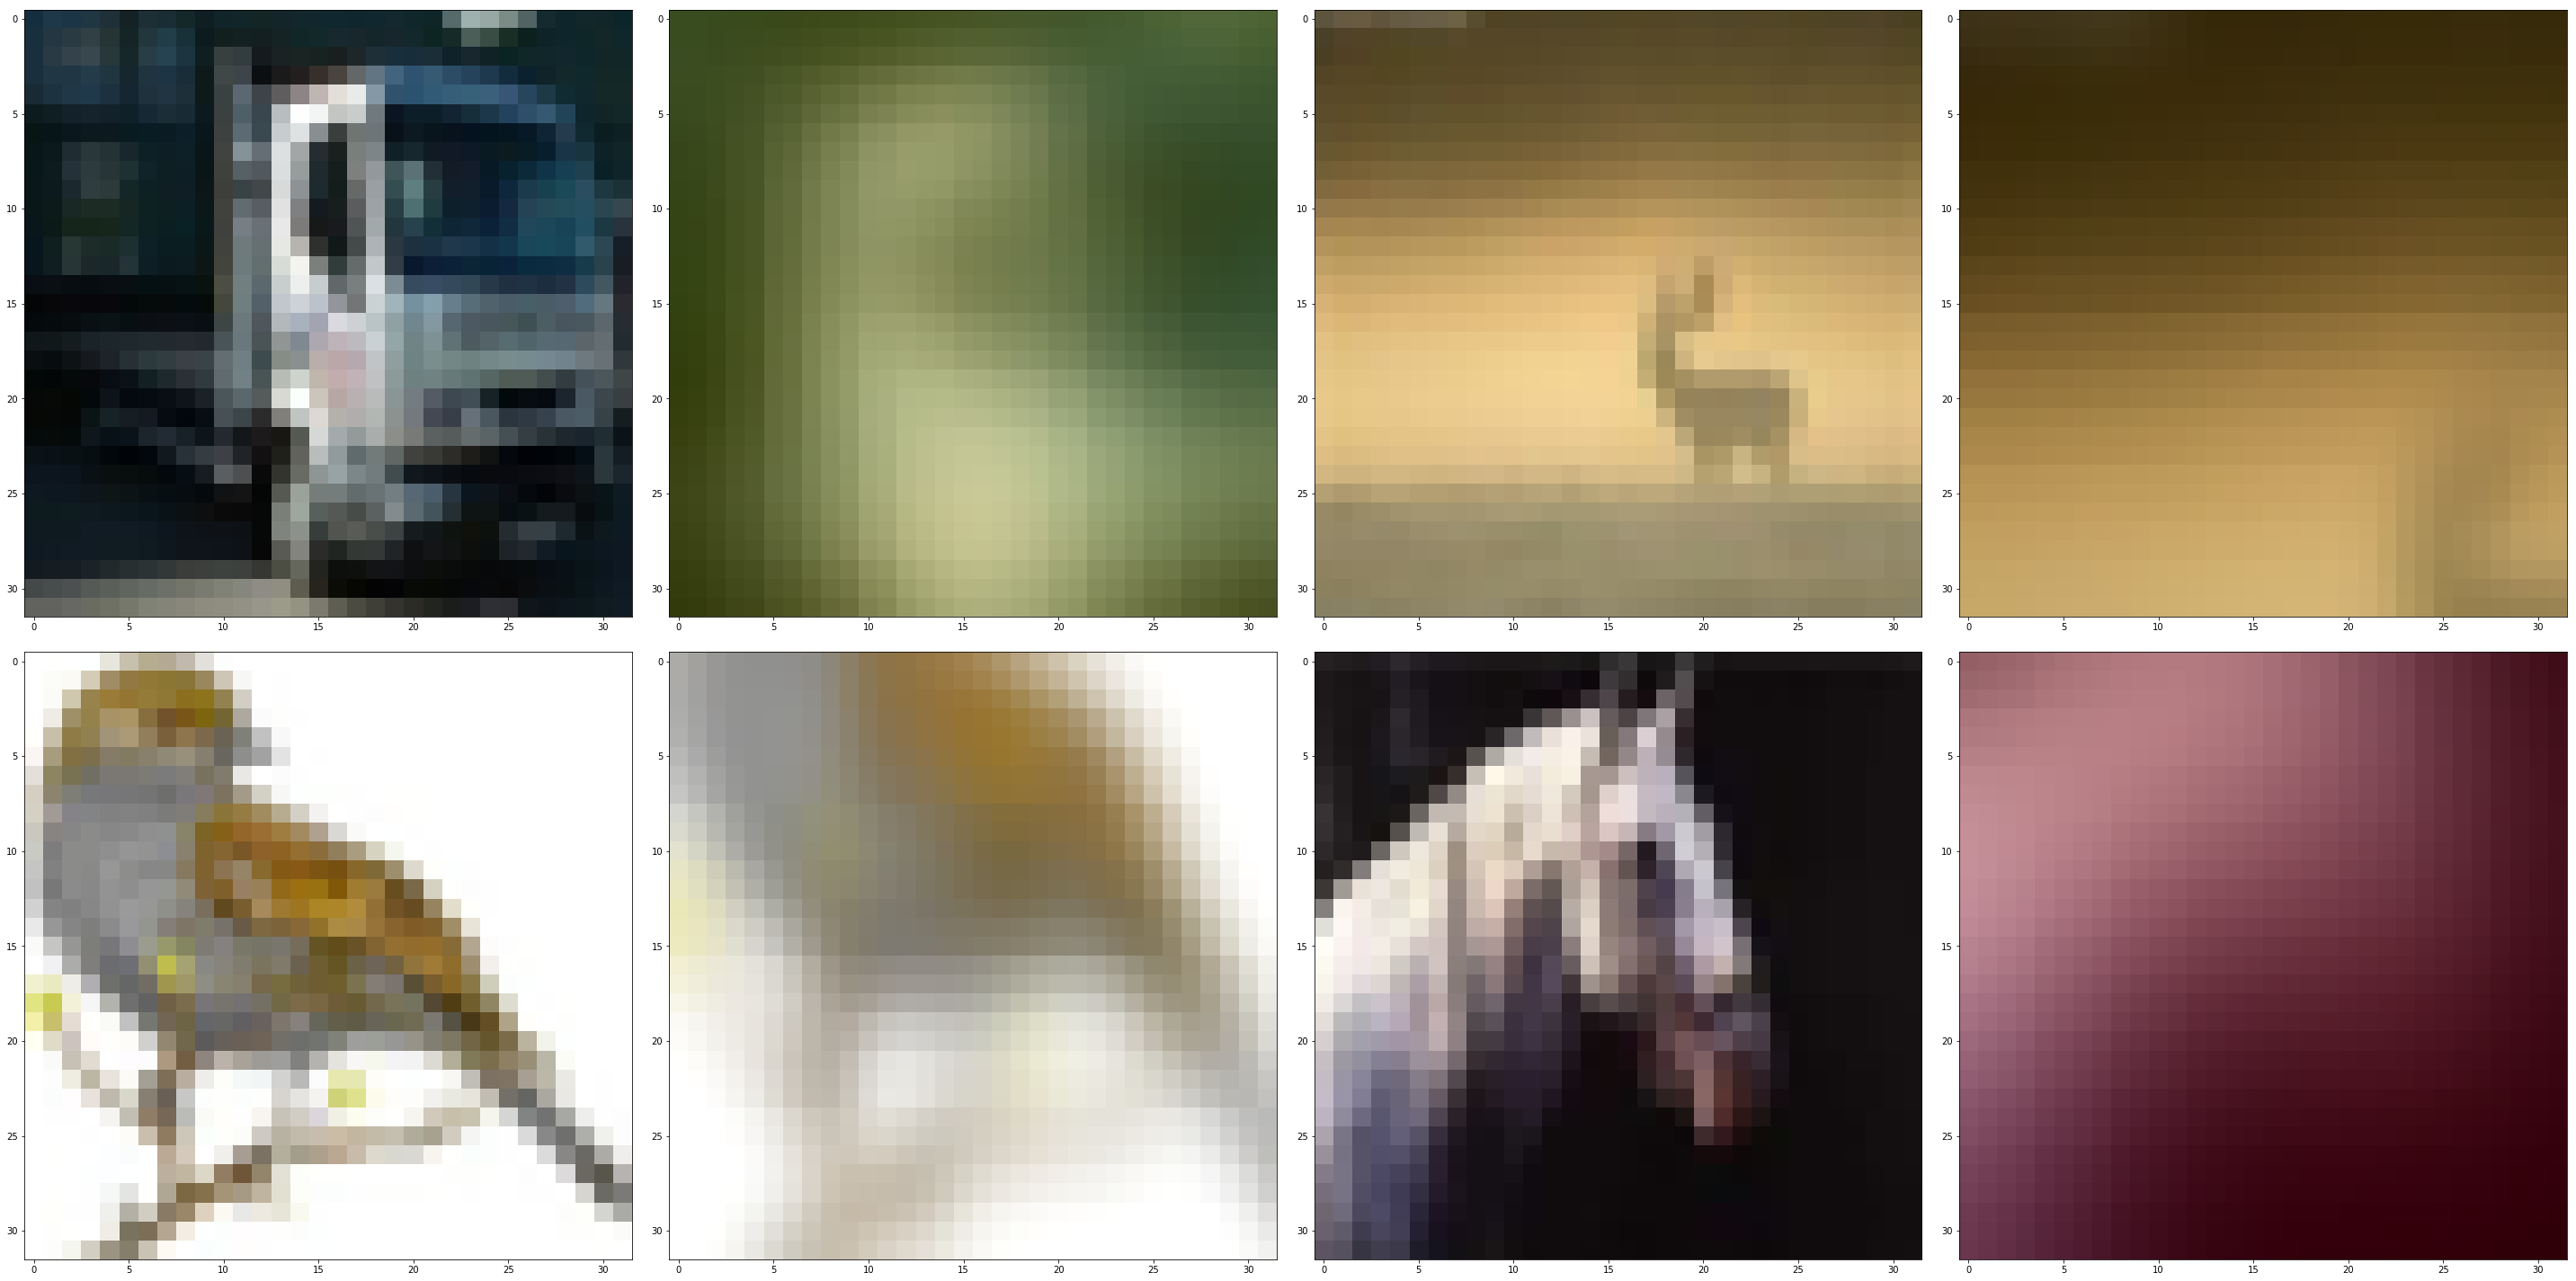

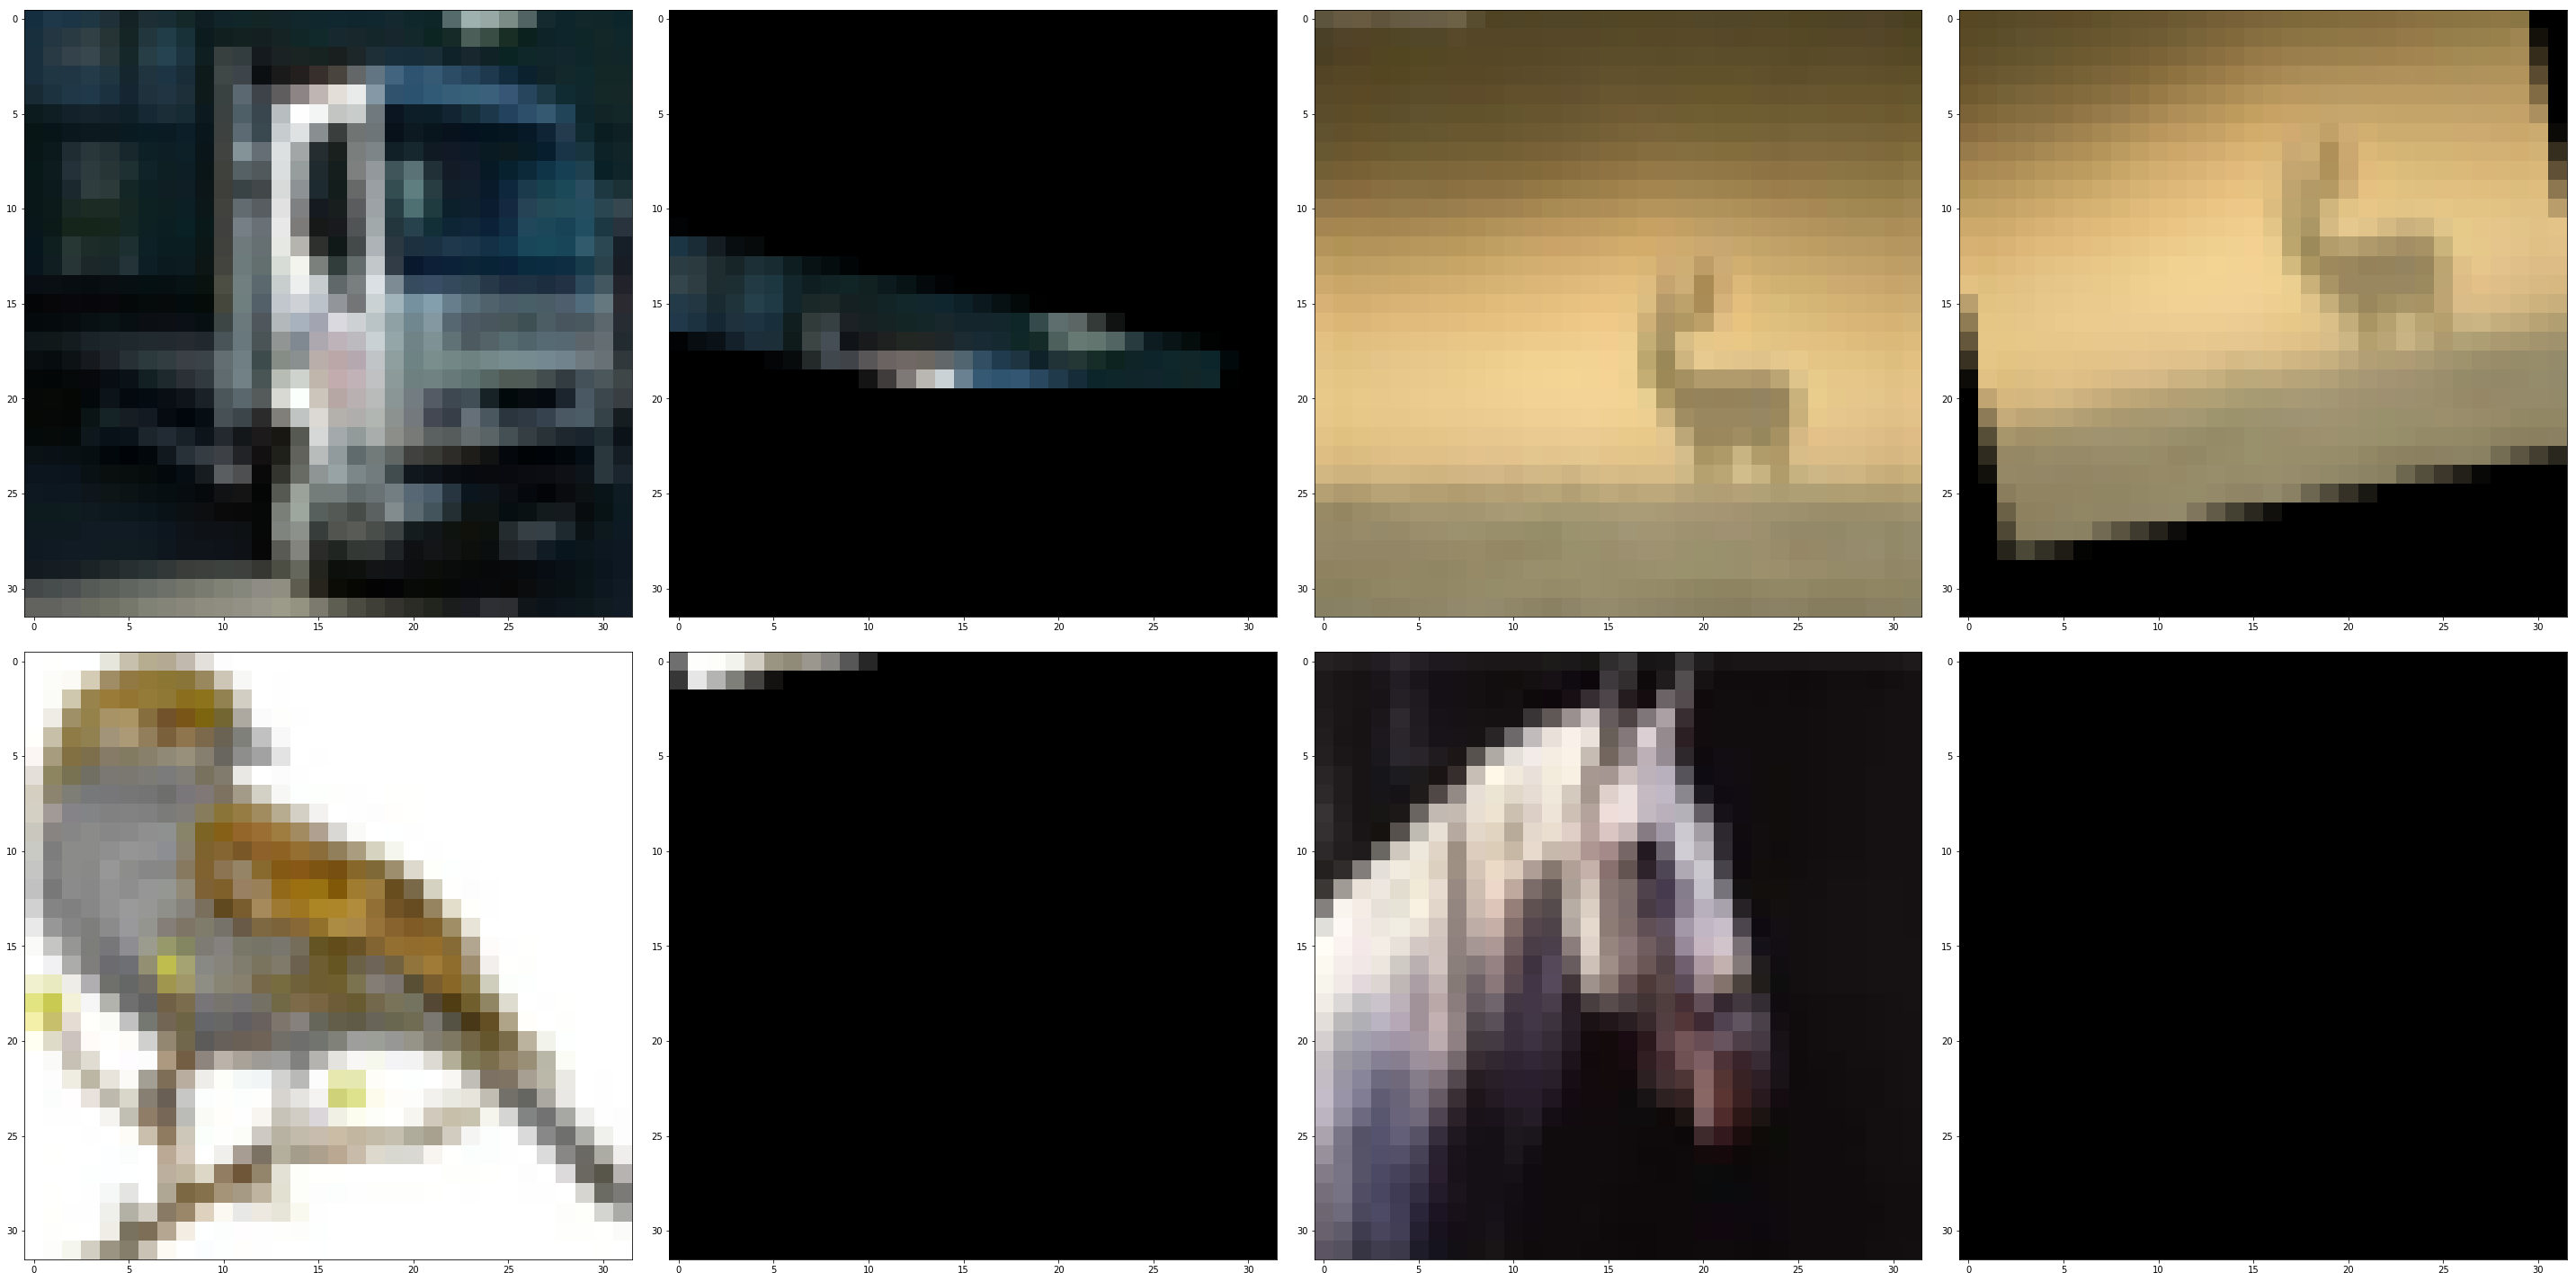

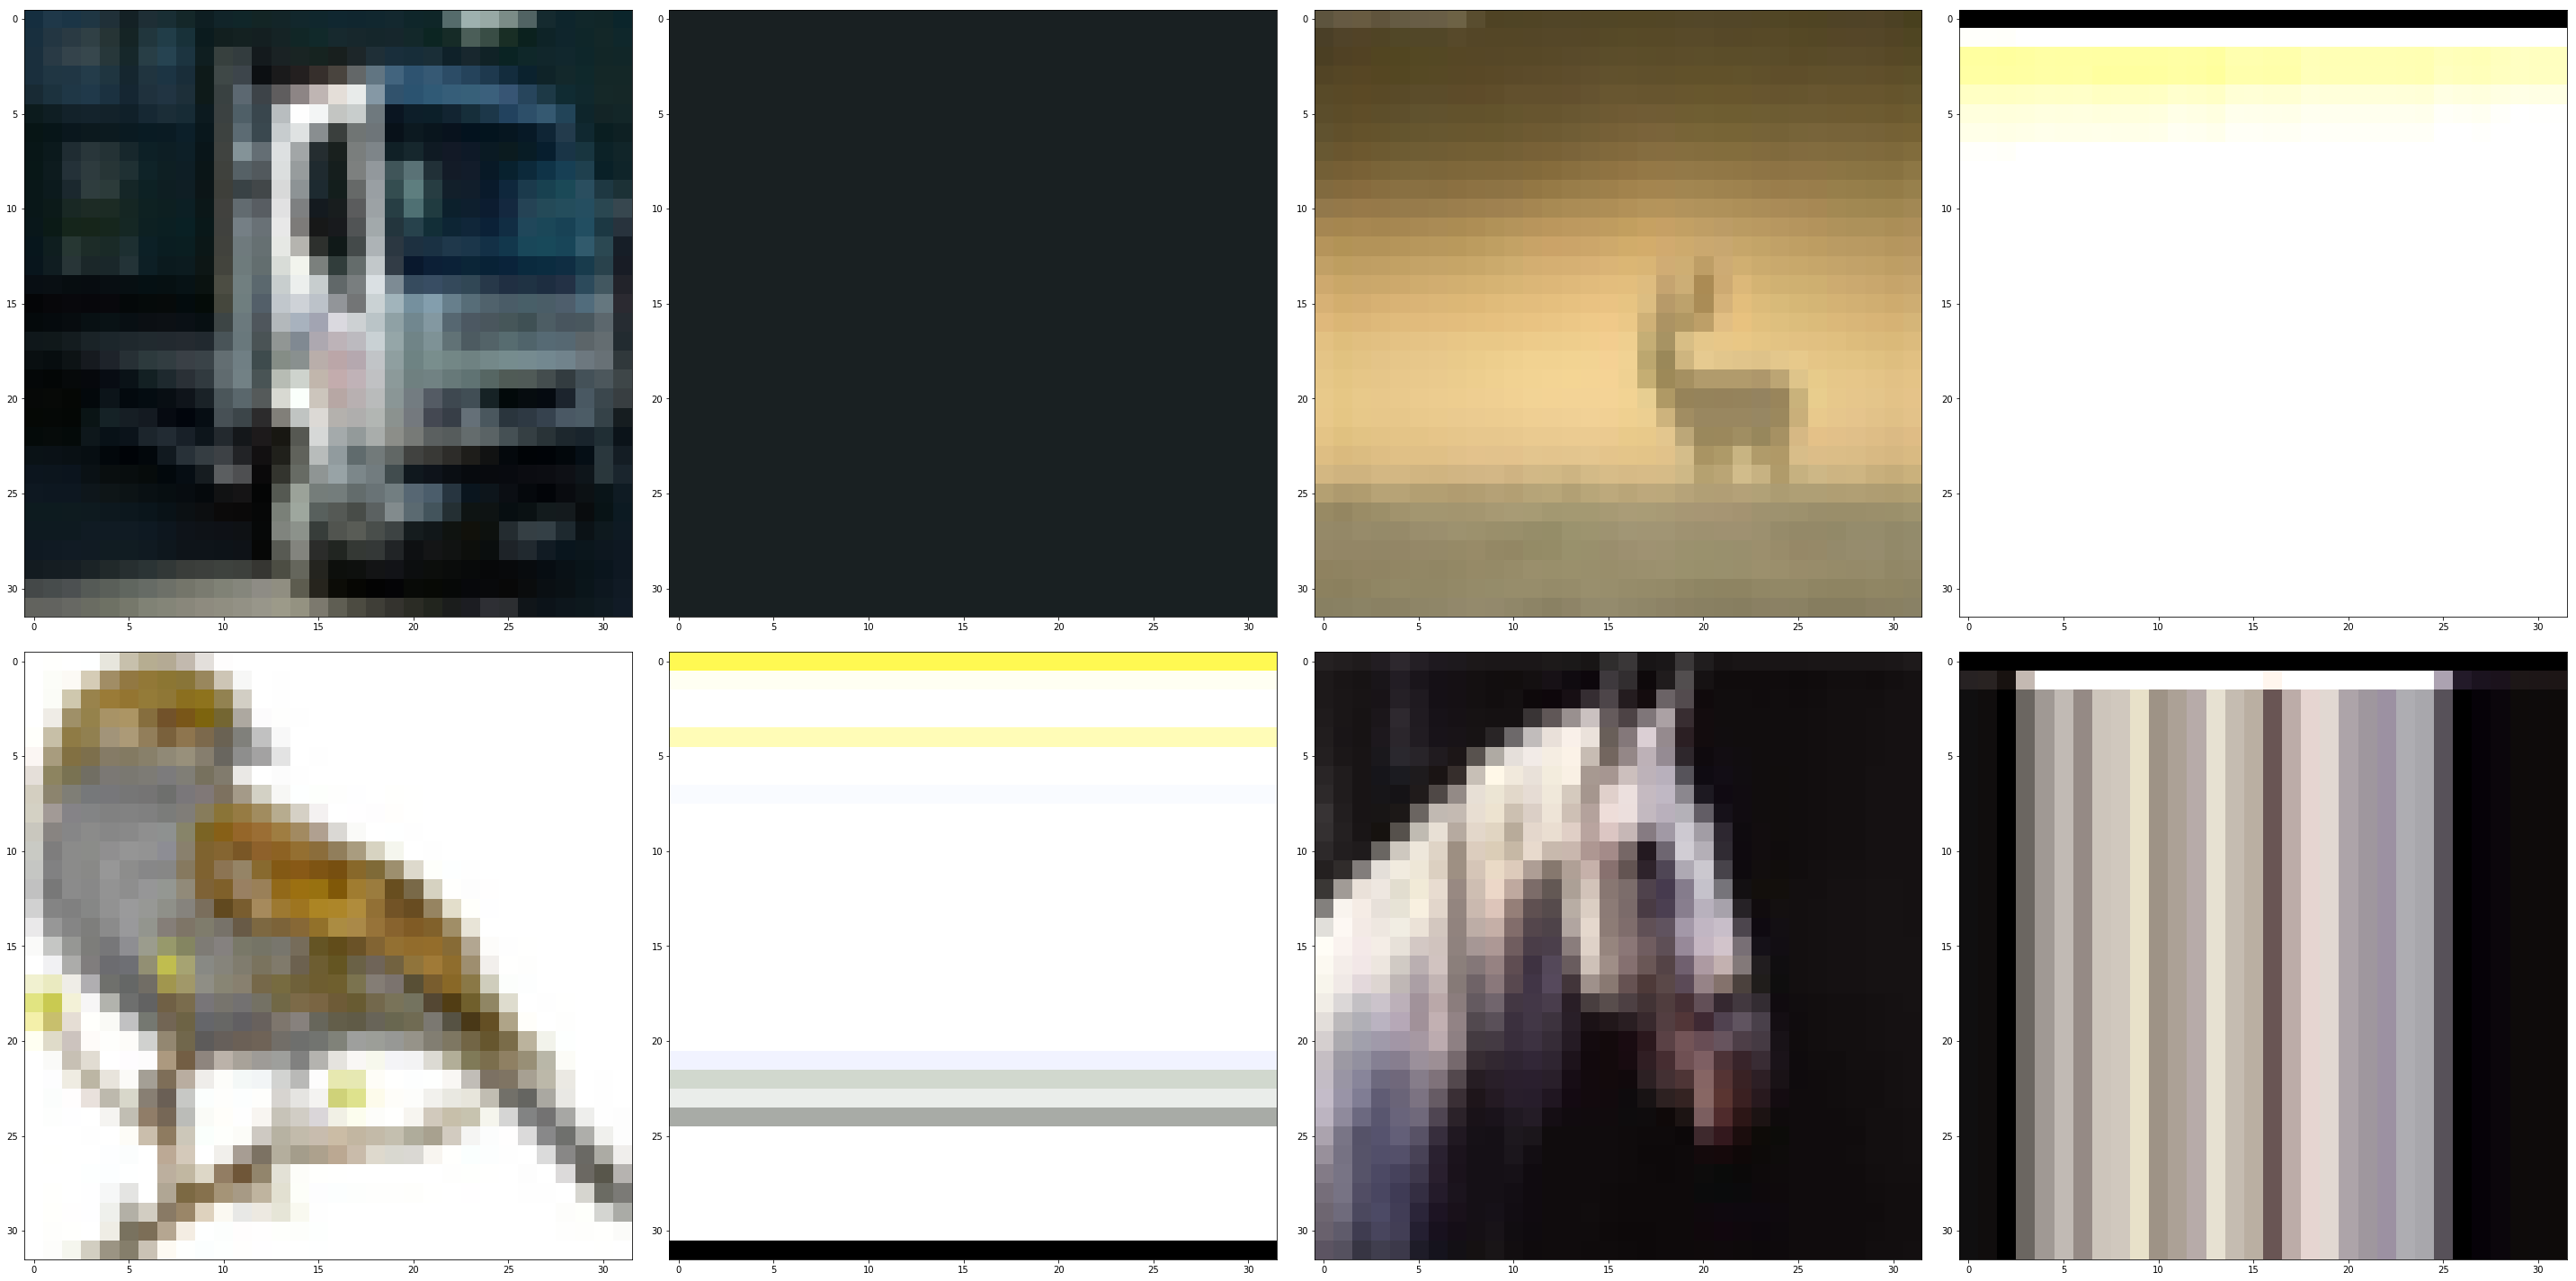

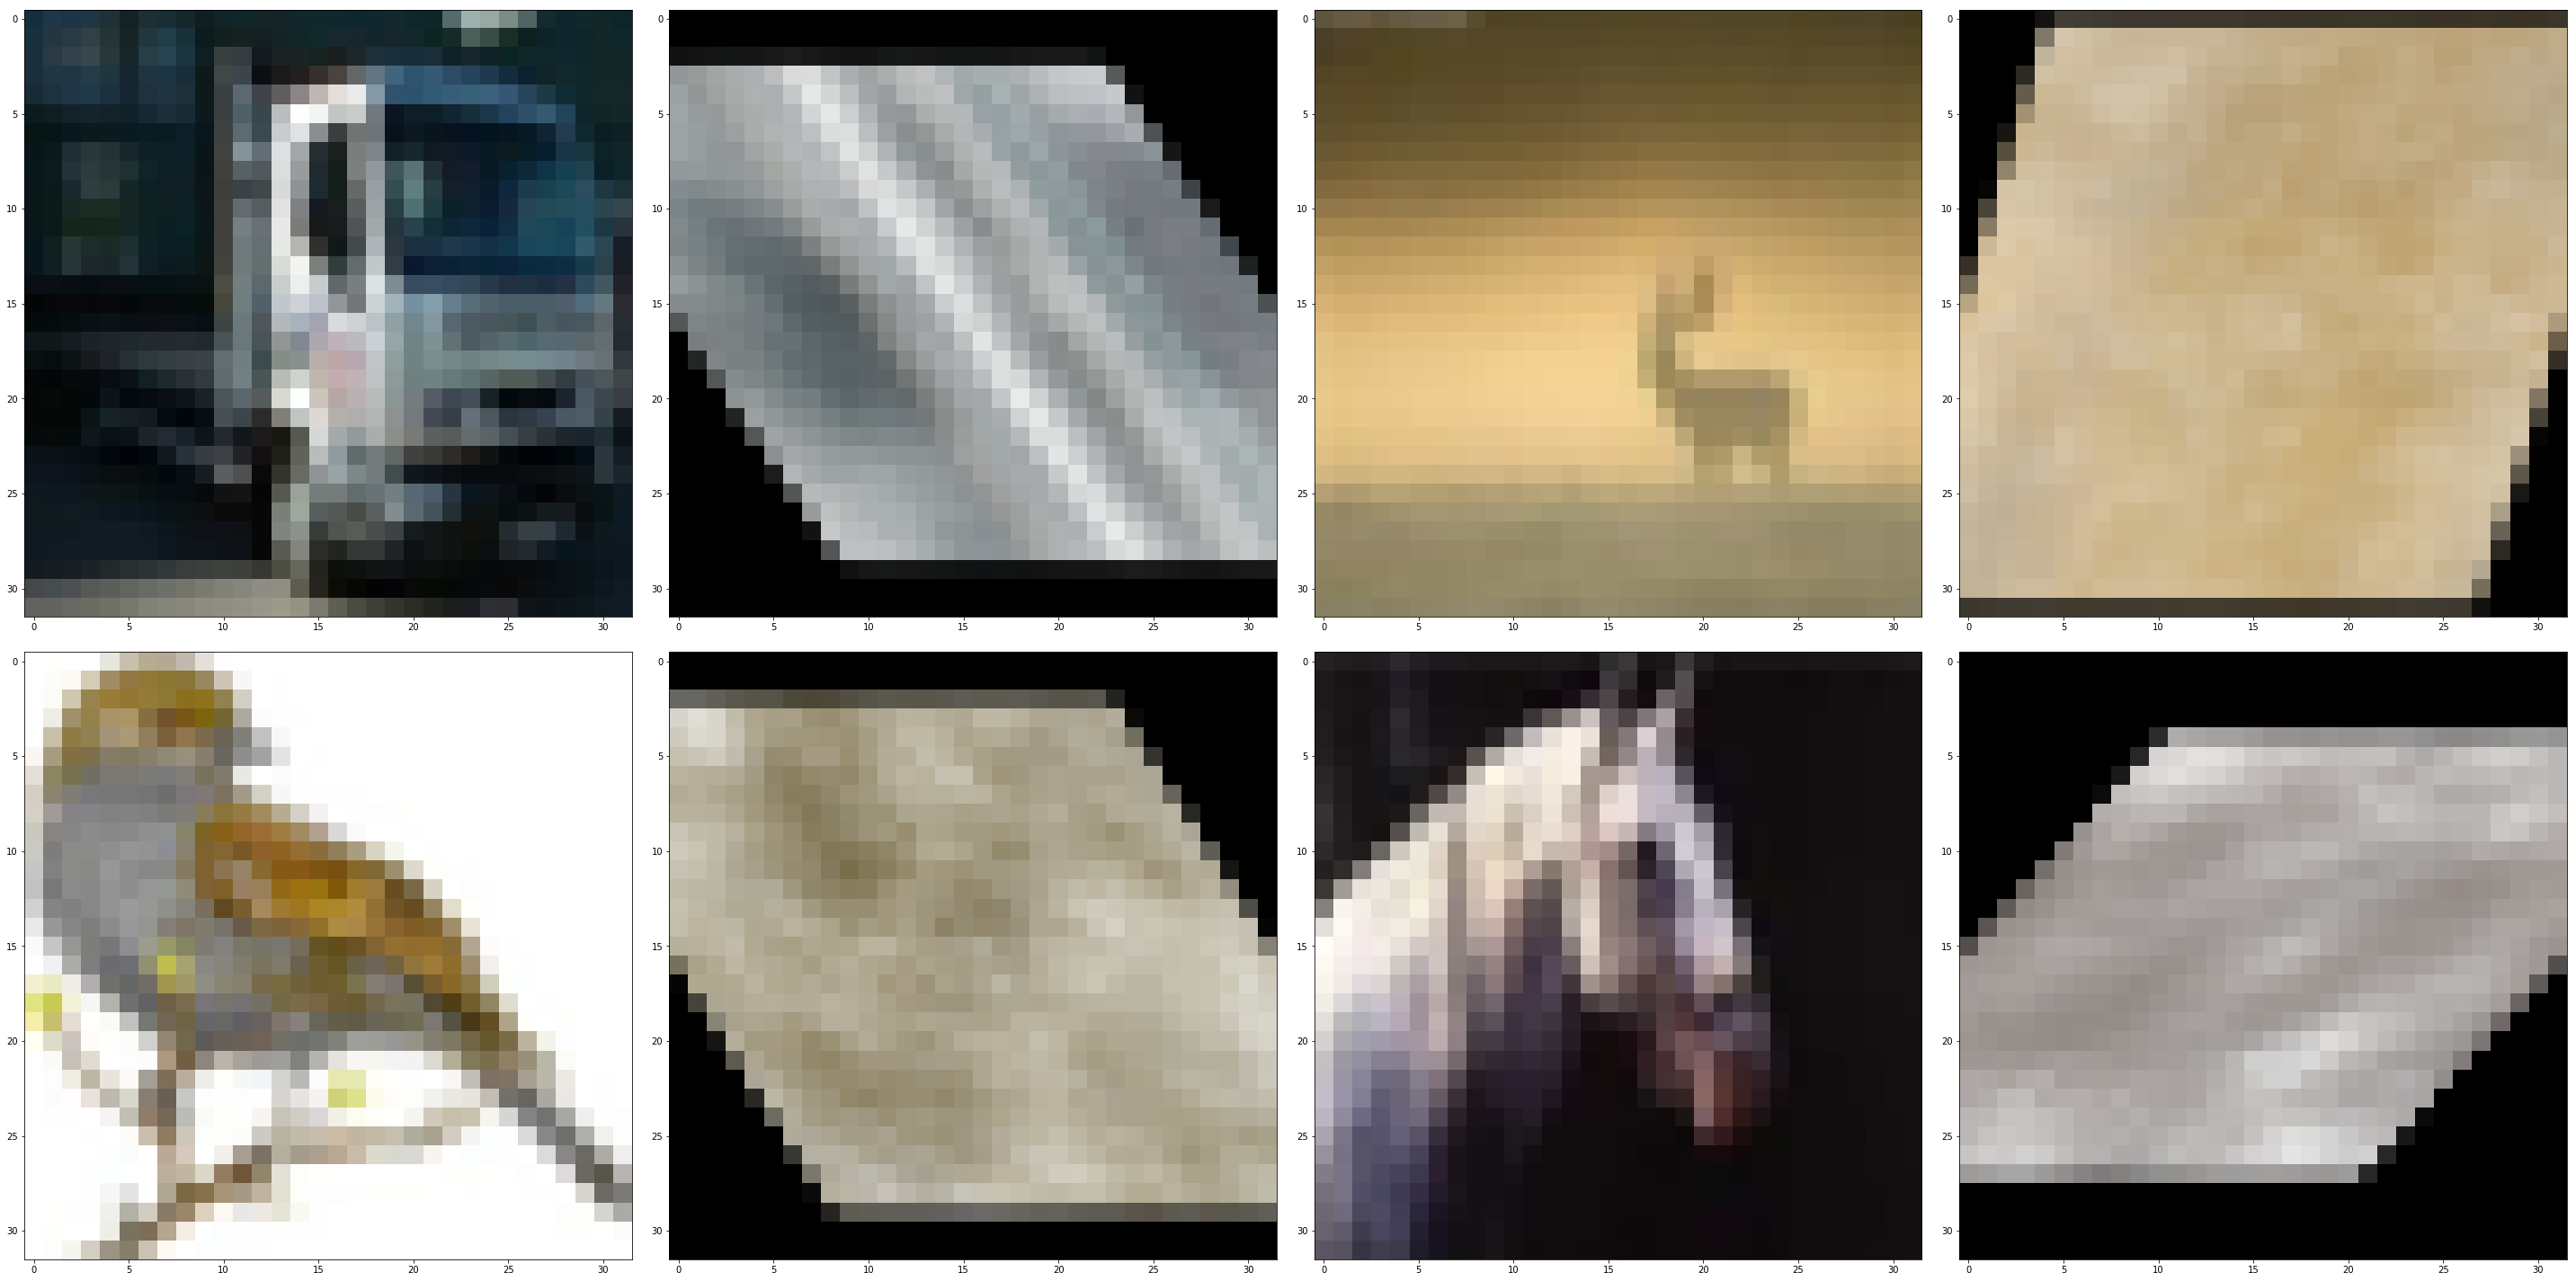

In [115]:
for i in top_policy_trial_no_arr:
    print (i)
    display_augmentation_by_trial_no(i, exp_df, data)

# Non-overfitting augmentations

In [140]:
exp_df["acc_overfit"] = exp_df["acc"] - exp_df["val_acc"]

acc_overfit_by_trial = exp_df[exp_df["epoch"]>30].groupby("trial_no").sum()["acc_overfit"]

# if acc_overfit is negative, that means validation is more accurate than training, so augmentation overfits
modified_exp_df = pd.merge(
    exp_df, 
    pd.DataFrame(acc_overfit_by_trial).reset_index().rename(columns={"acc_overfit":"total_acc_overfit"}),
    on="trial_no",
    how="left"
)

non_overfitting_exp_df = modified_exp_df[modified_exp_df["total_acc_overfit"]>0]

trial_no: 28
['gaussian-blur', 0.98, 'crop', 0.379, 'brighten', 0.9159999999999999, 1.0]
trial_no: 29
['invert', 0.9840000000000001, 'translate-y', 0.374, 'shear', 0.7929999999999999, 1.0]
trial_no: 11
['clouds', 0.978, 'coarse-dropout', 0.907, 'rotate', 0.96, 1.0]
trial_no: 36
['shear', 0.9840000000000001, 'gamma-contrast', 0.682, 'brighten', 0.852, 1.0]
trial_no: 34
['emboss', 0.986, 'clouds', 0.583, 'sharpen', 0.513, 1.0]


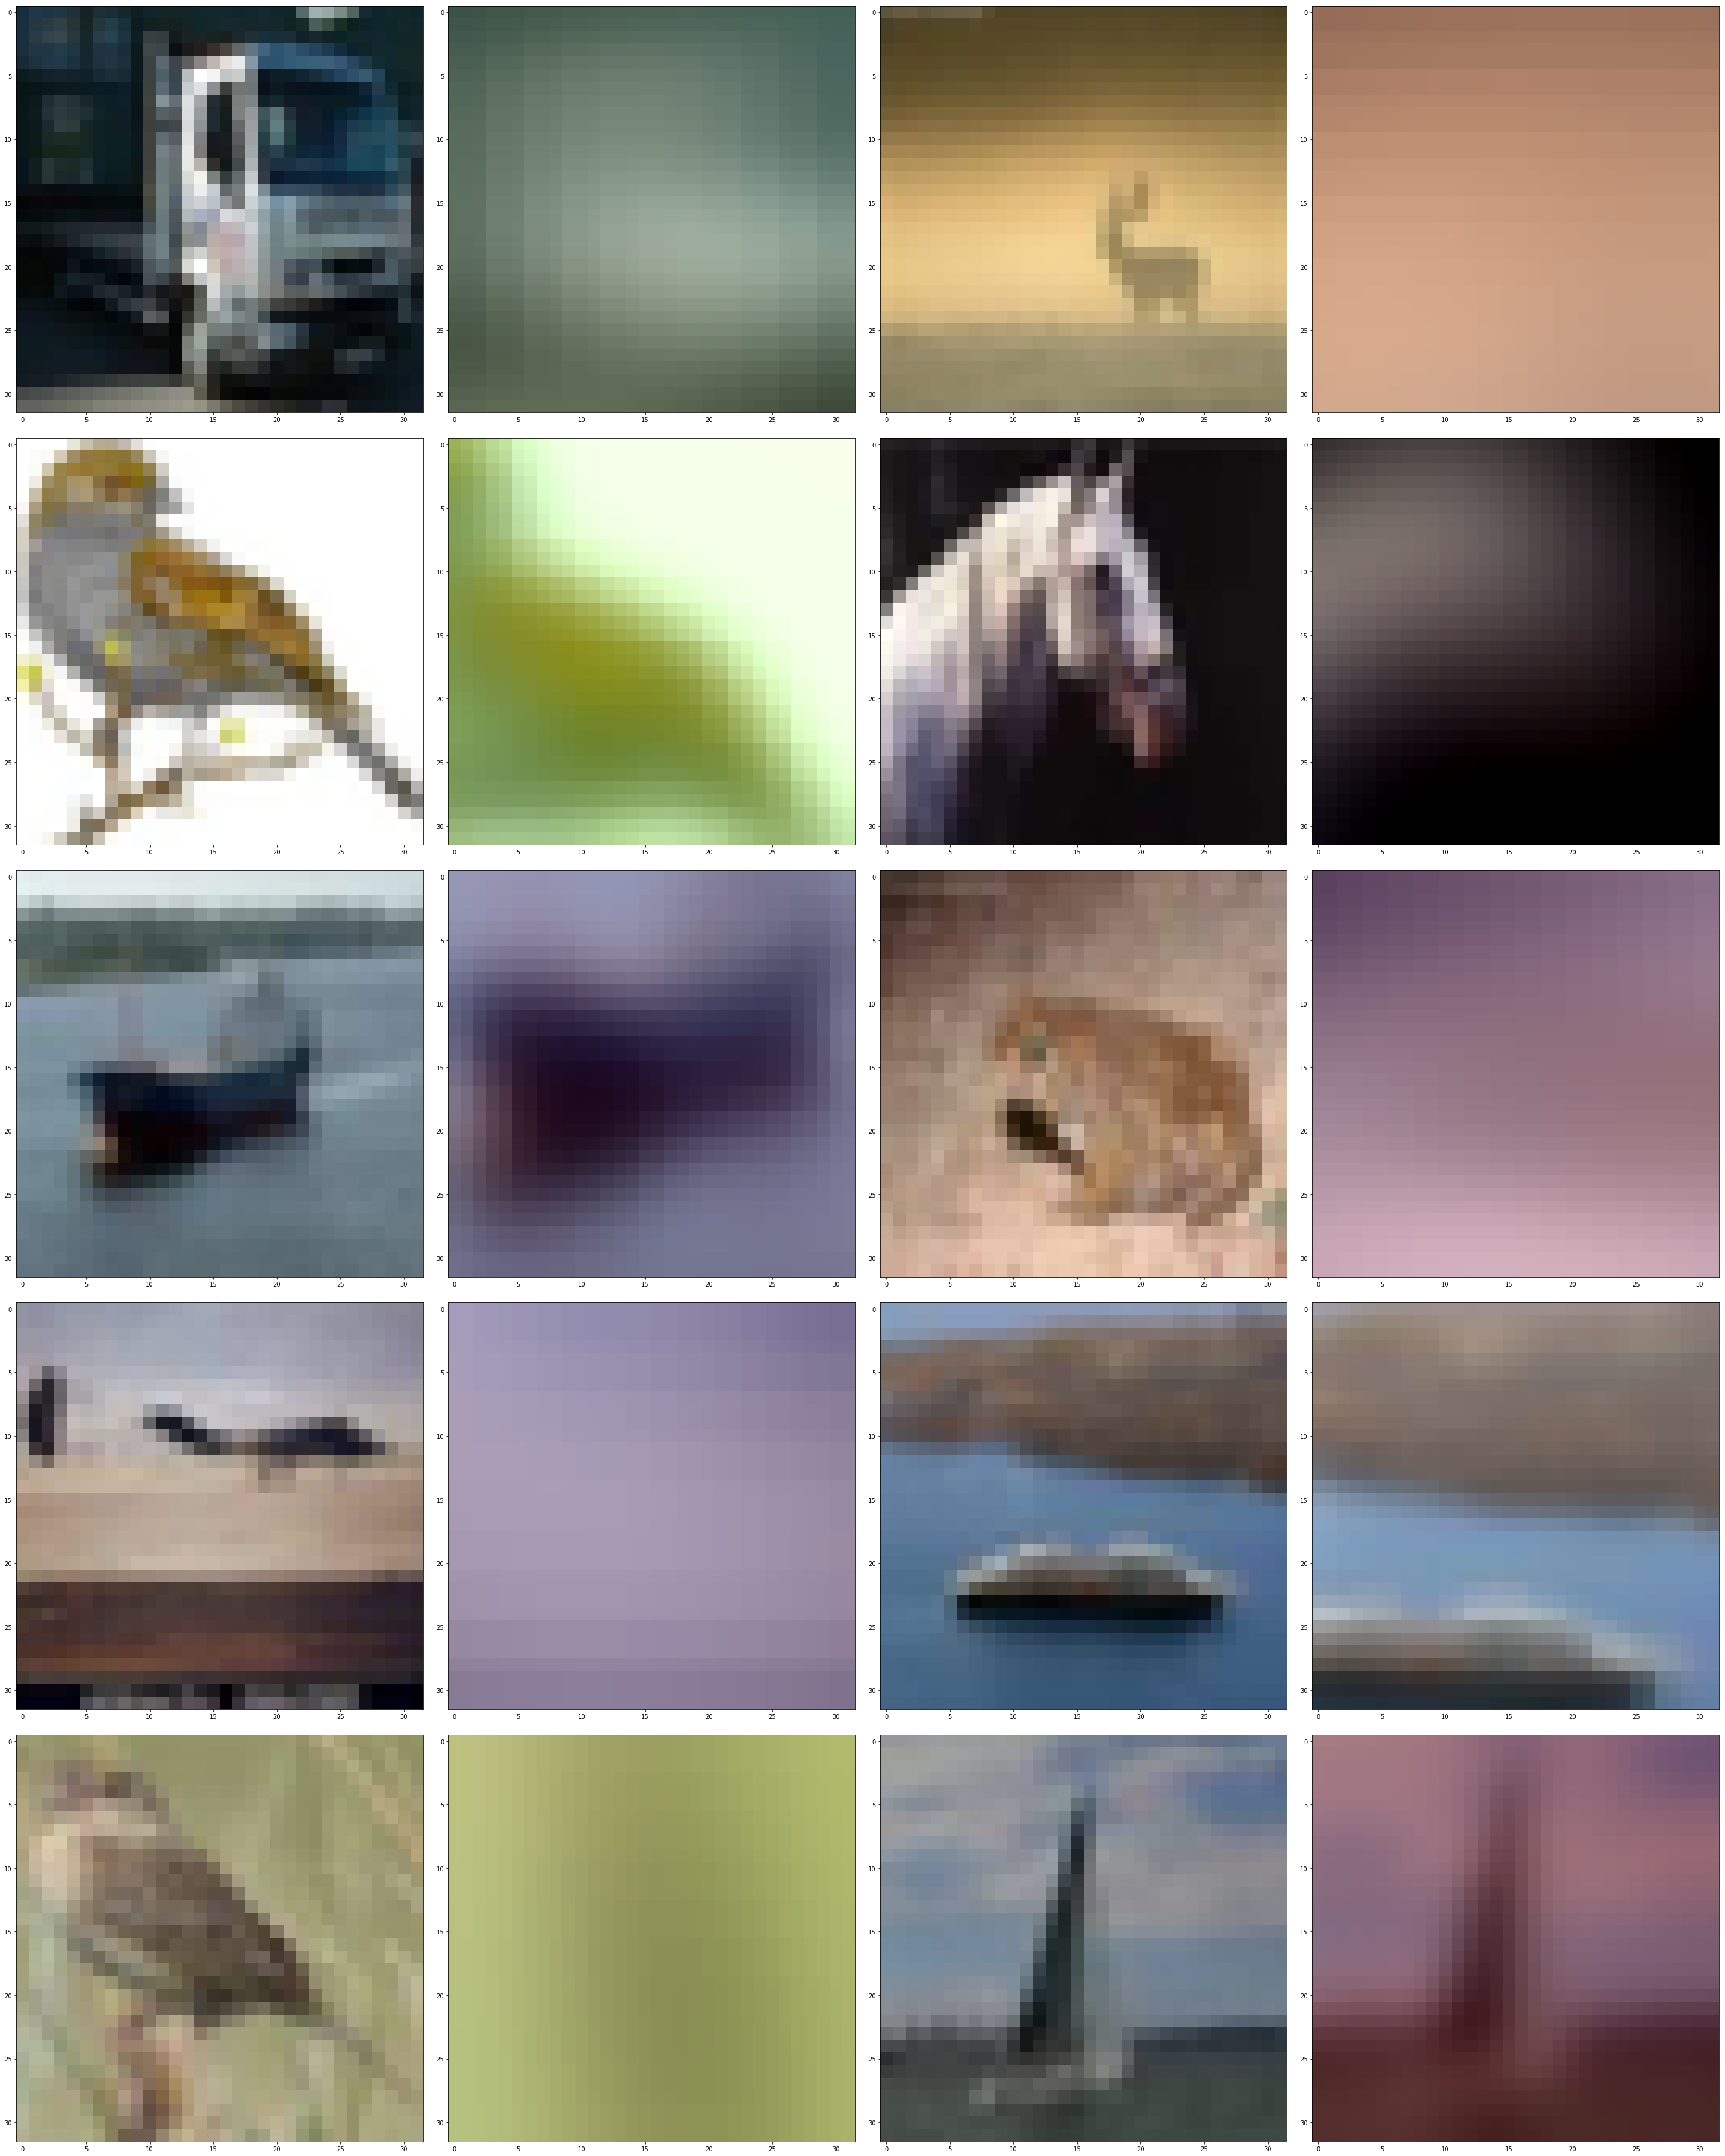

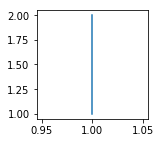

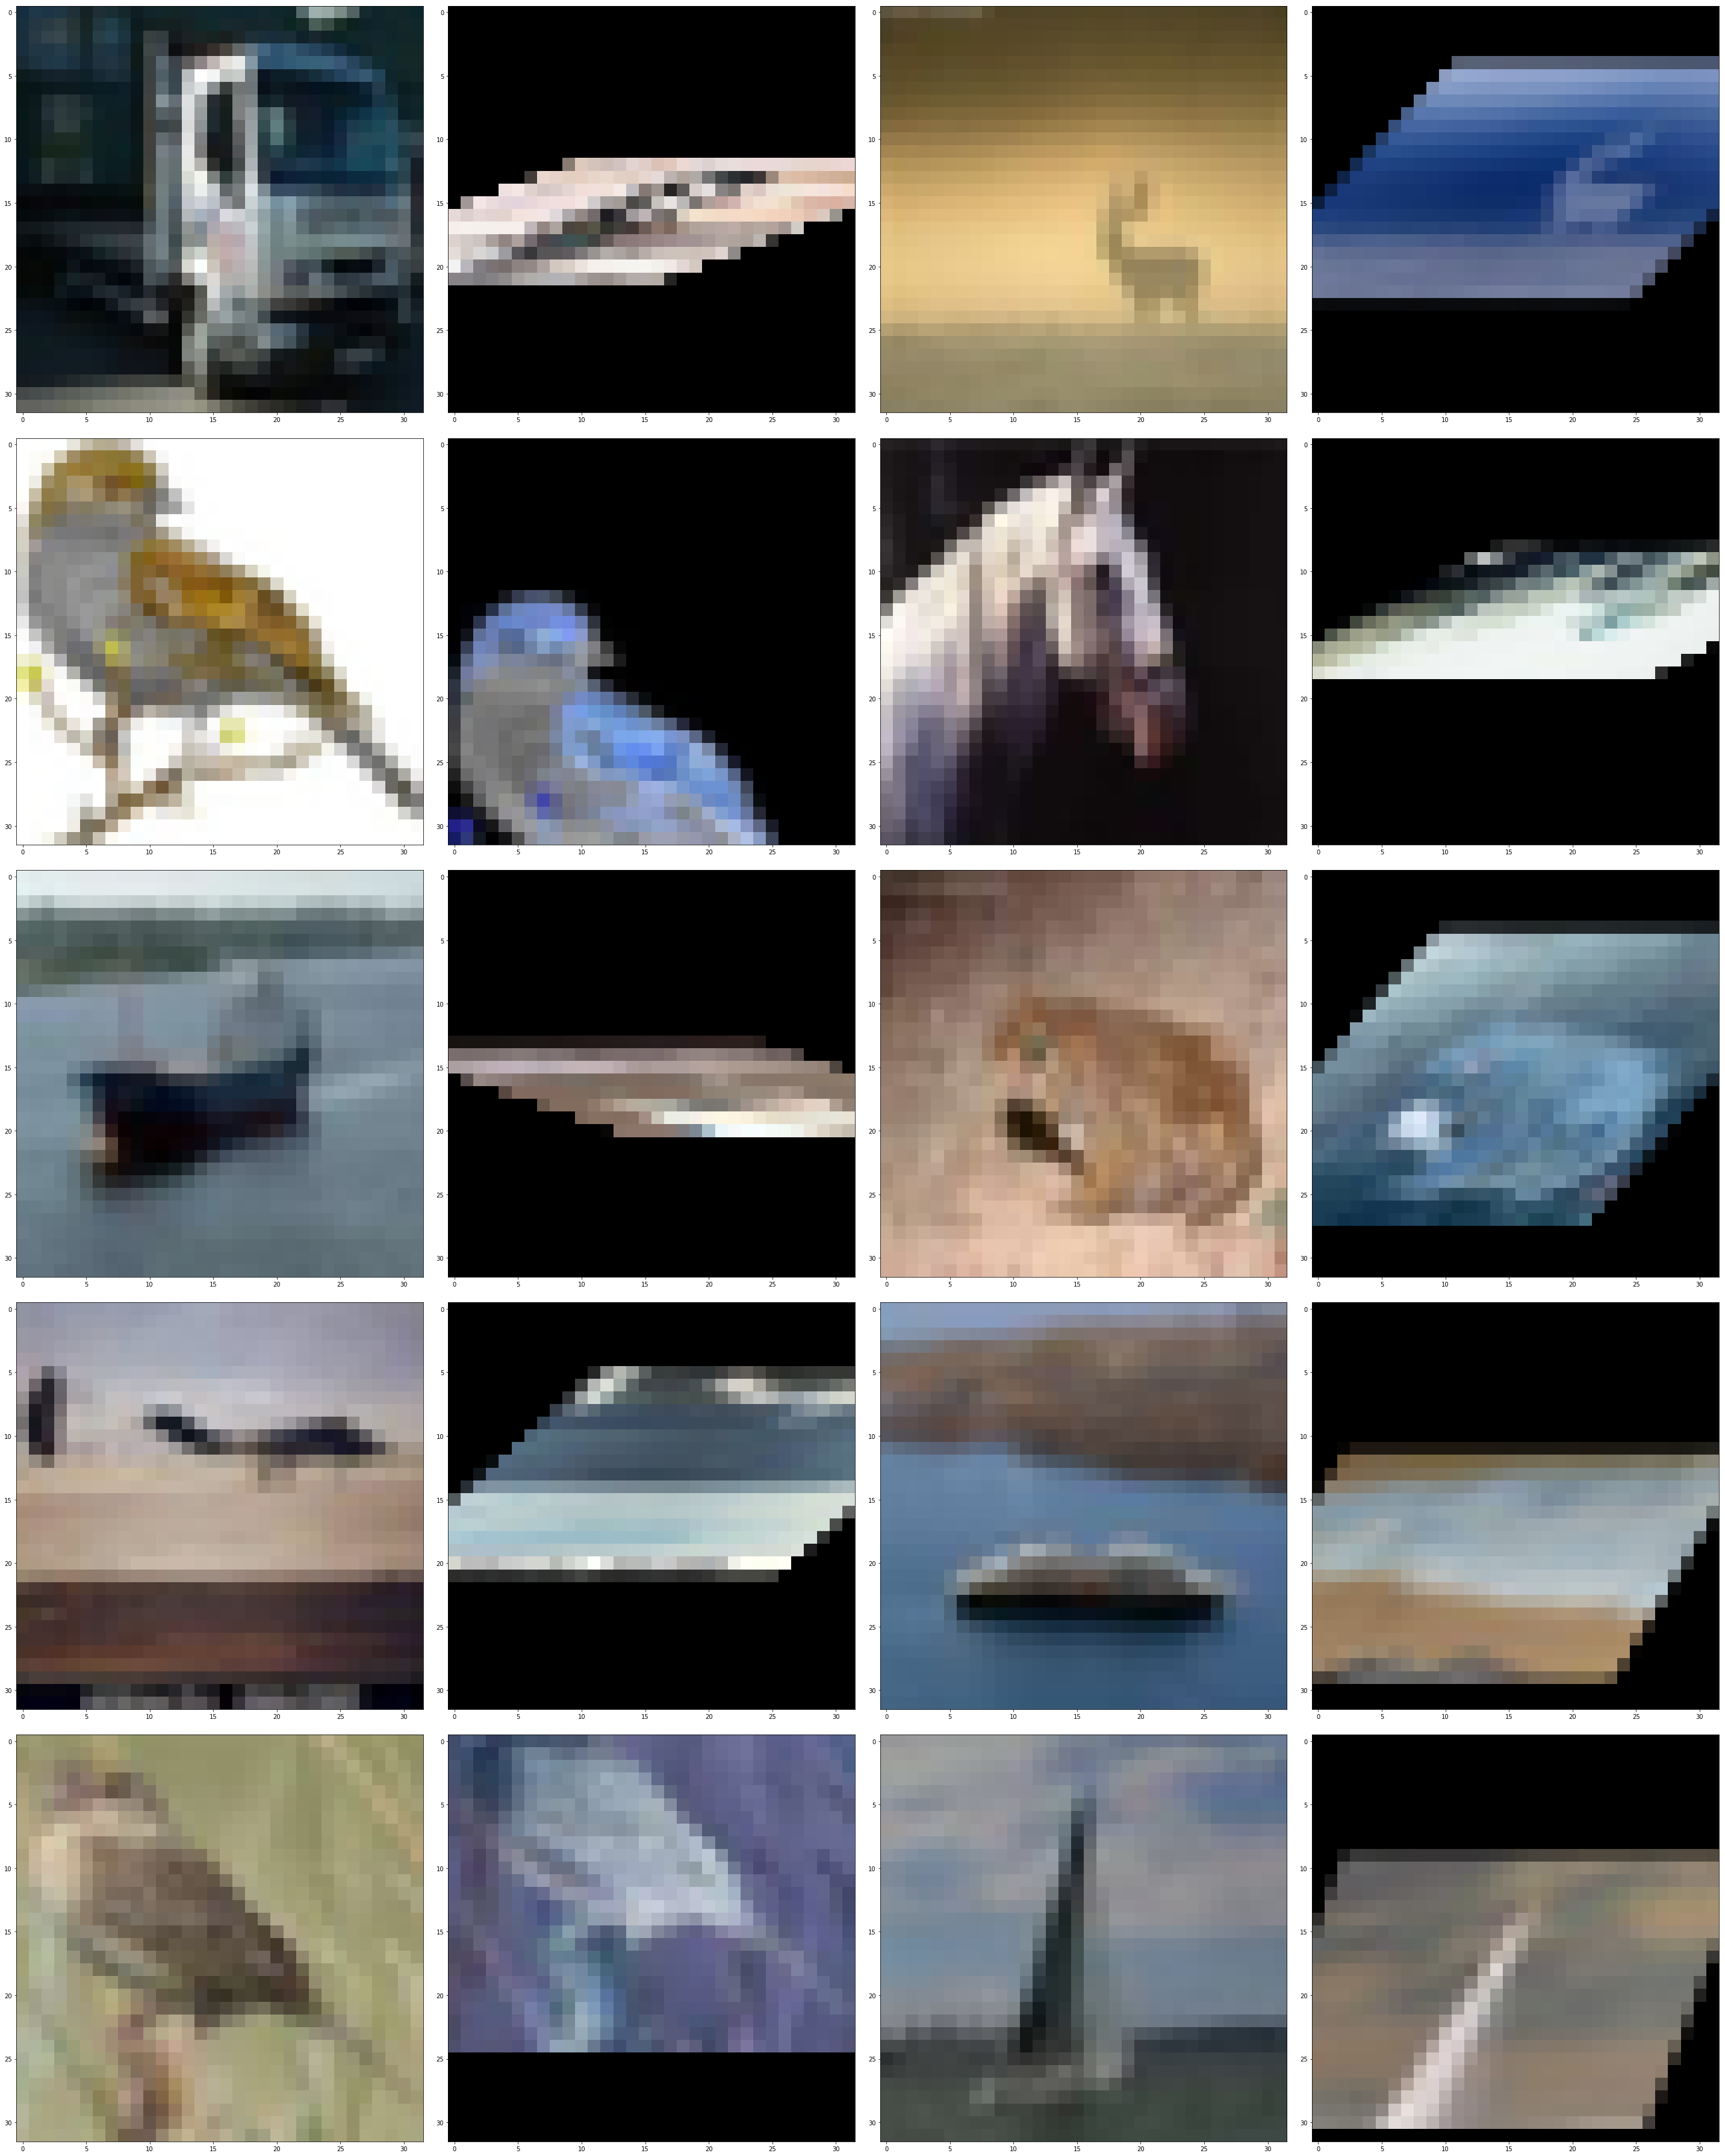

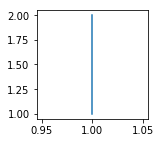

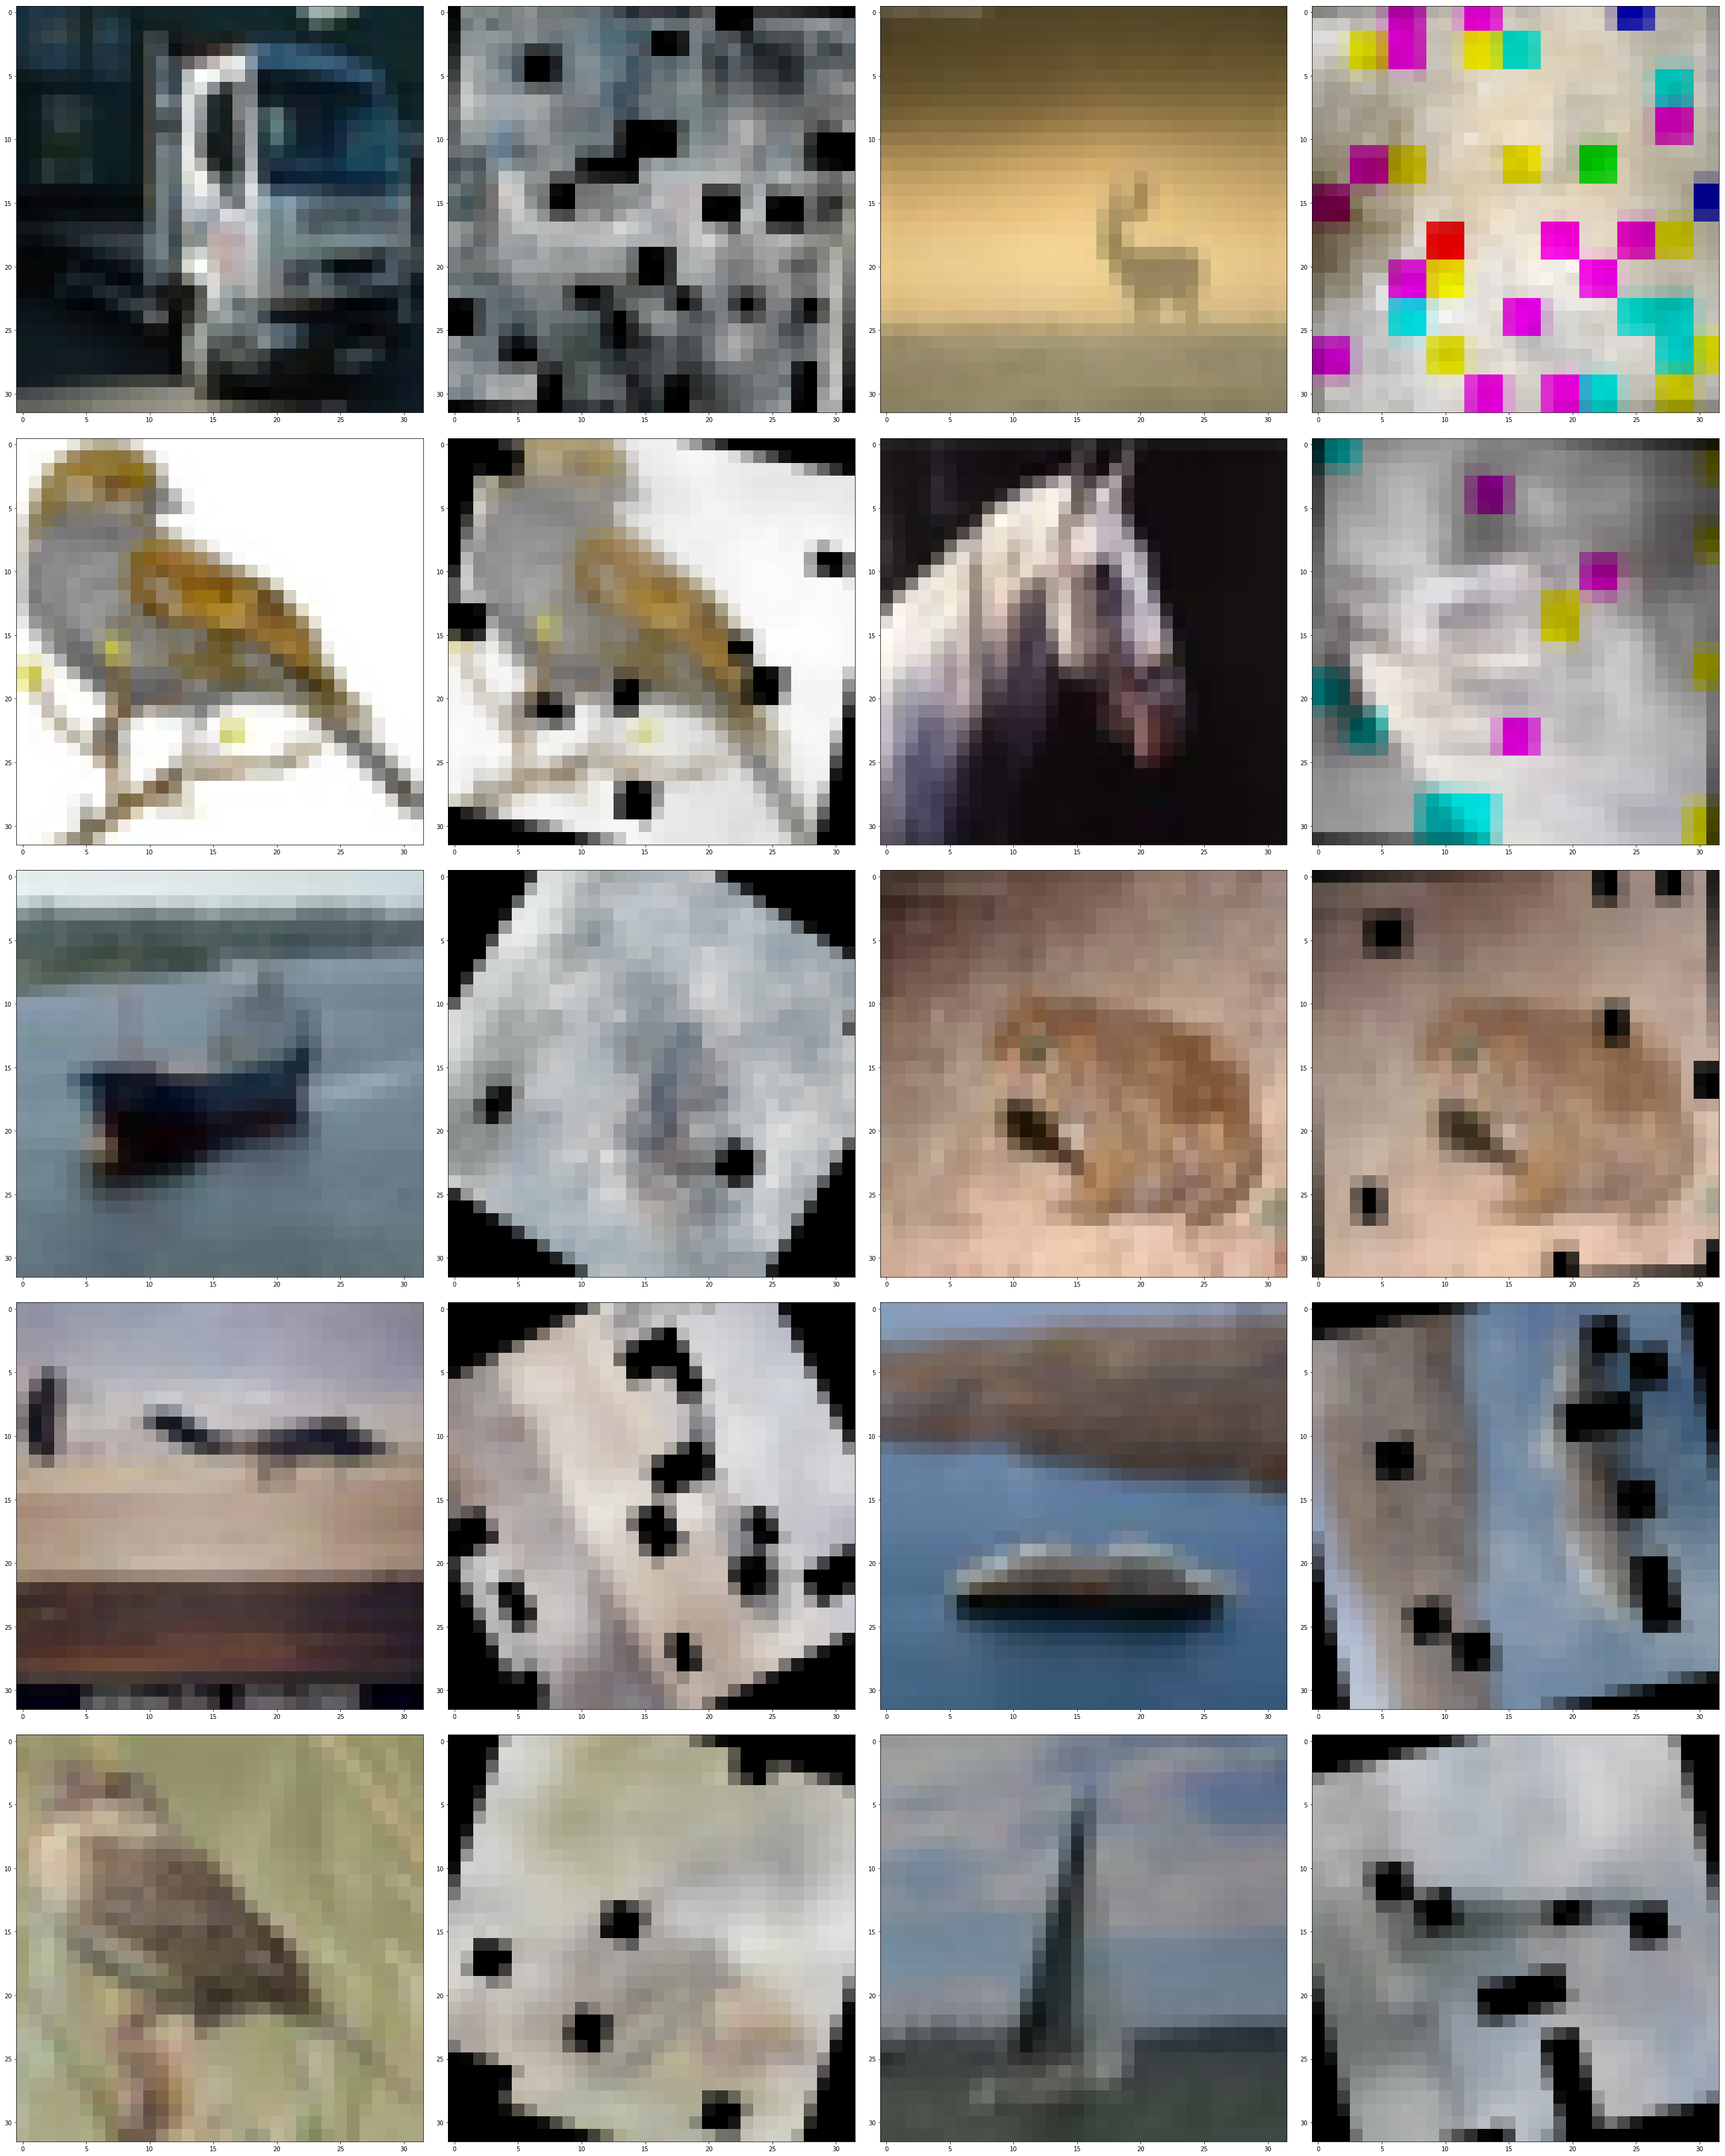

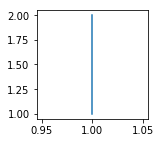

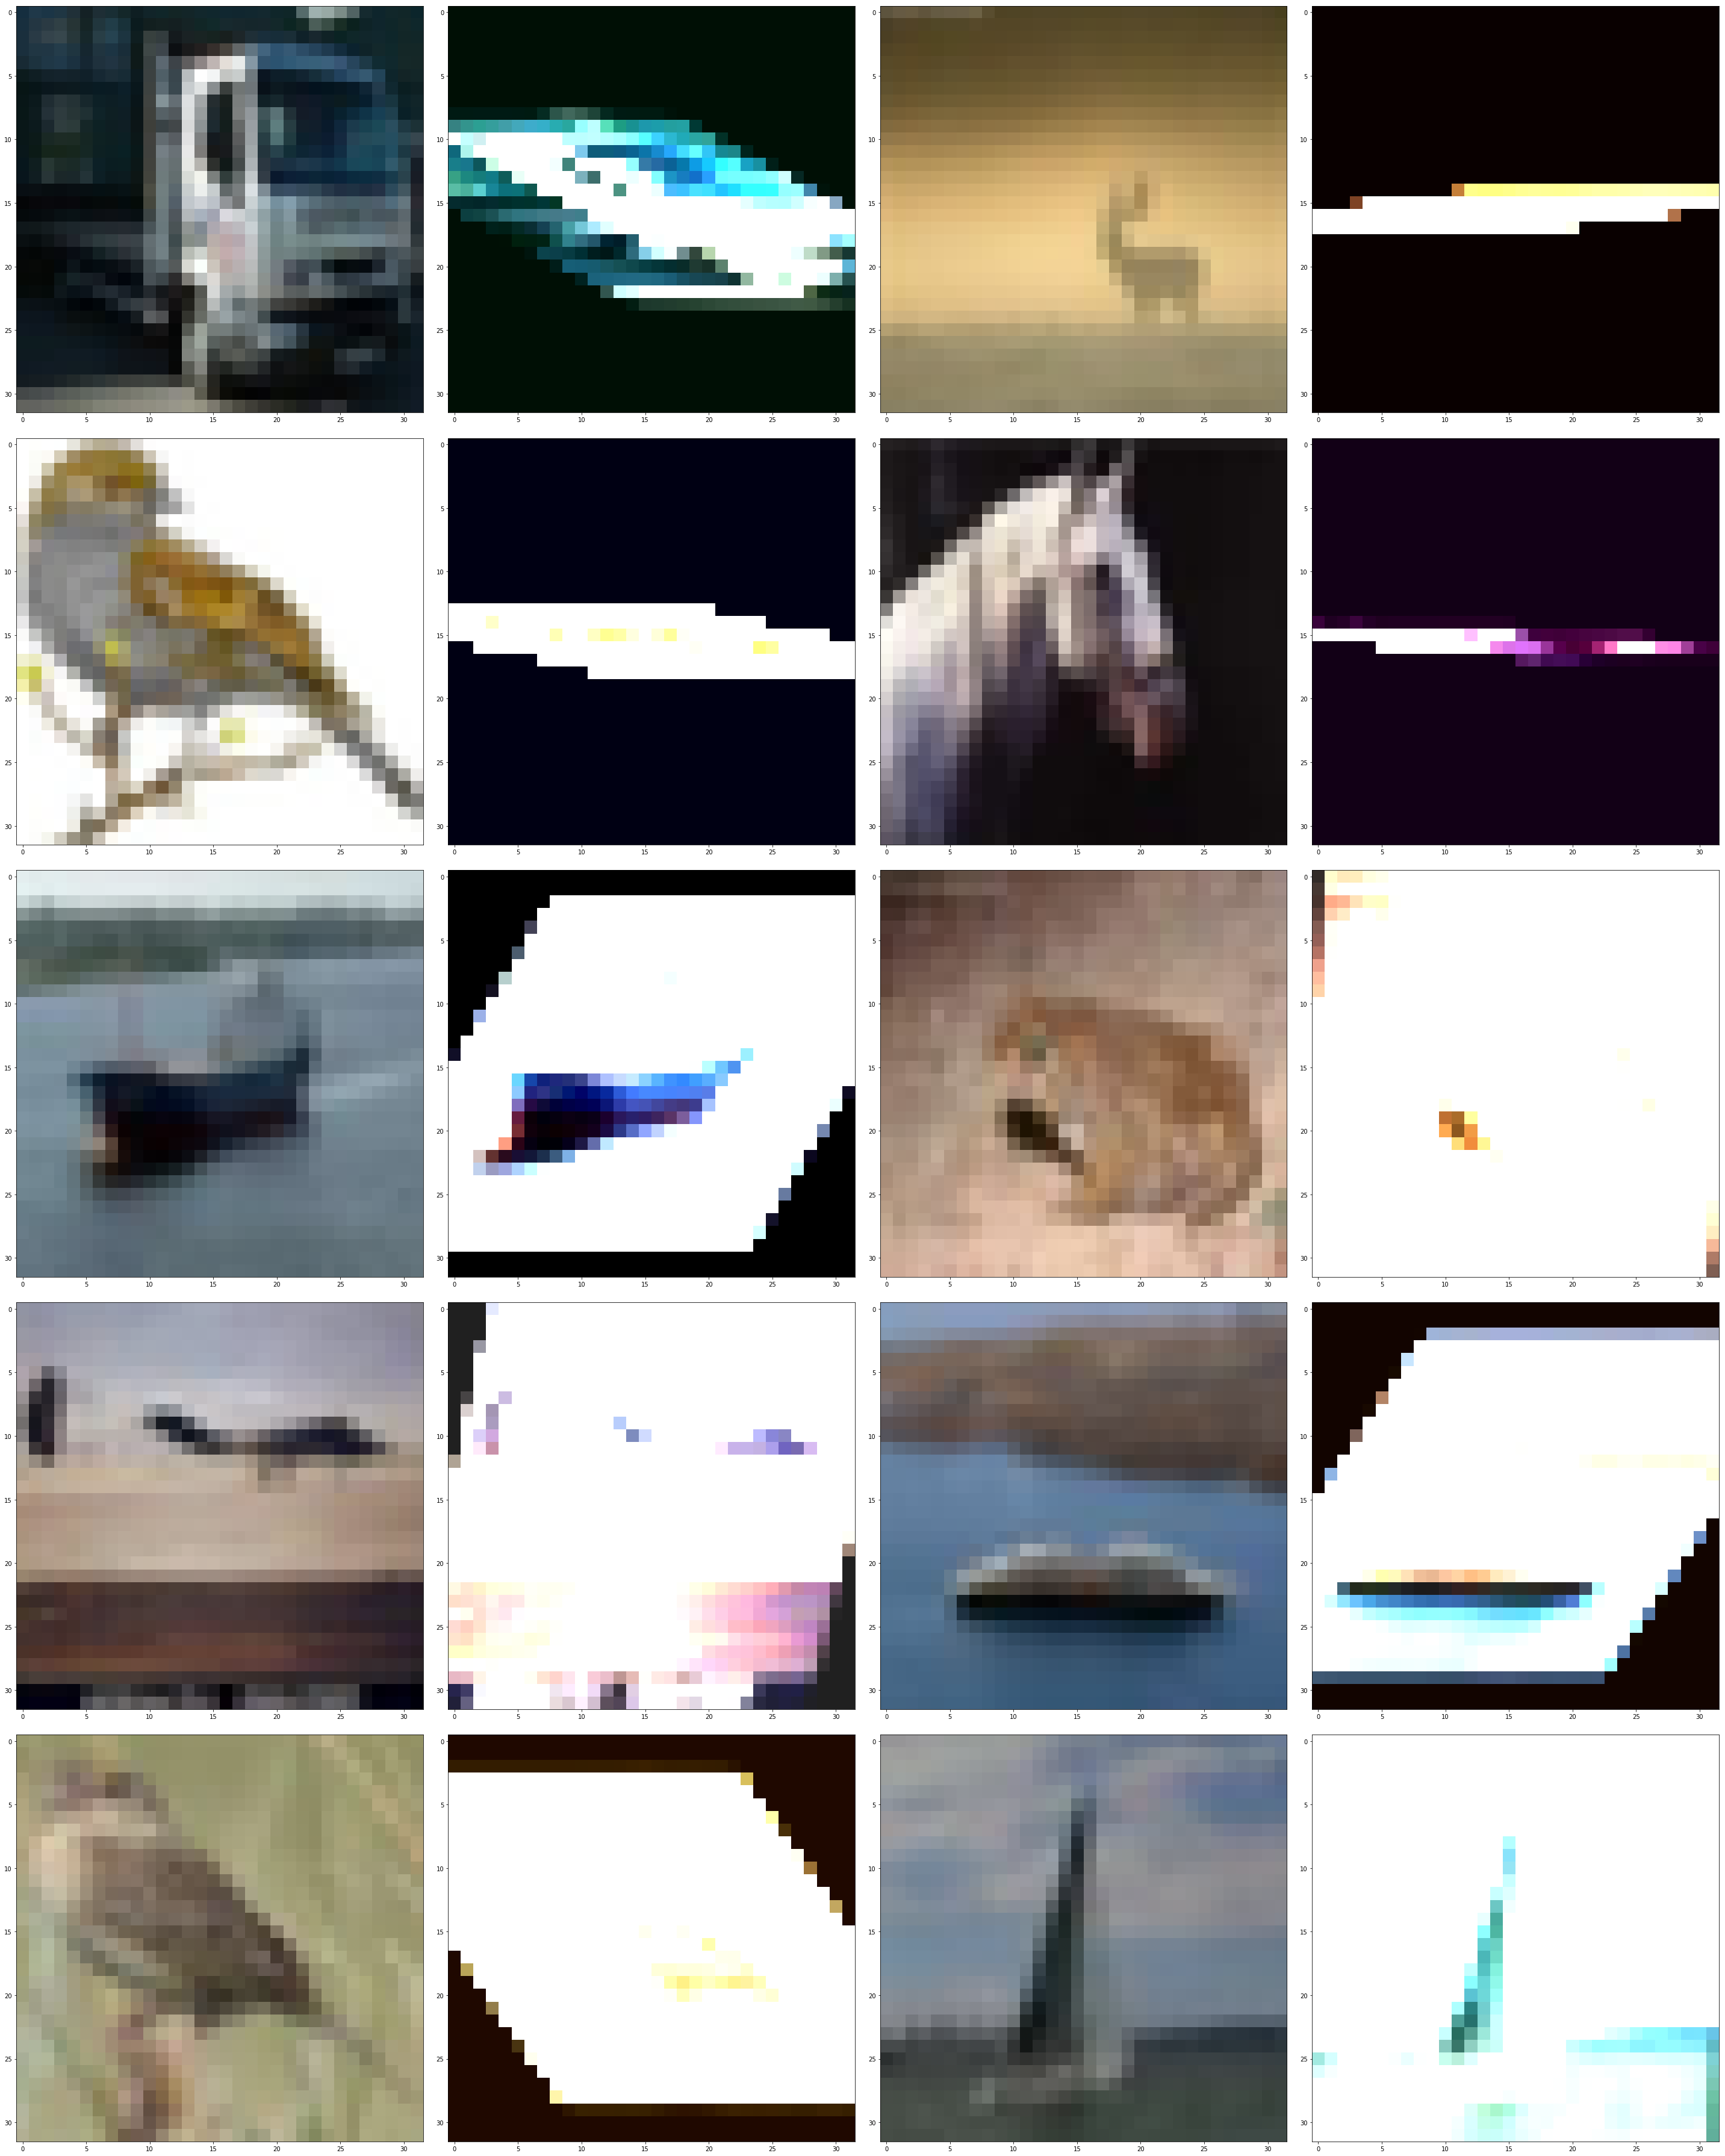

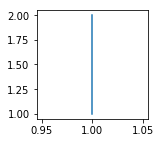

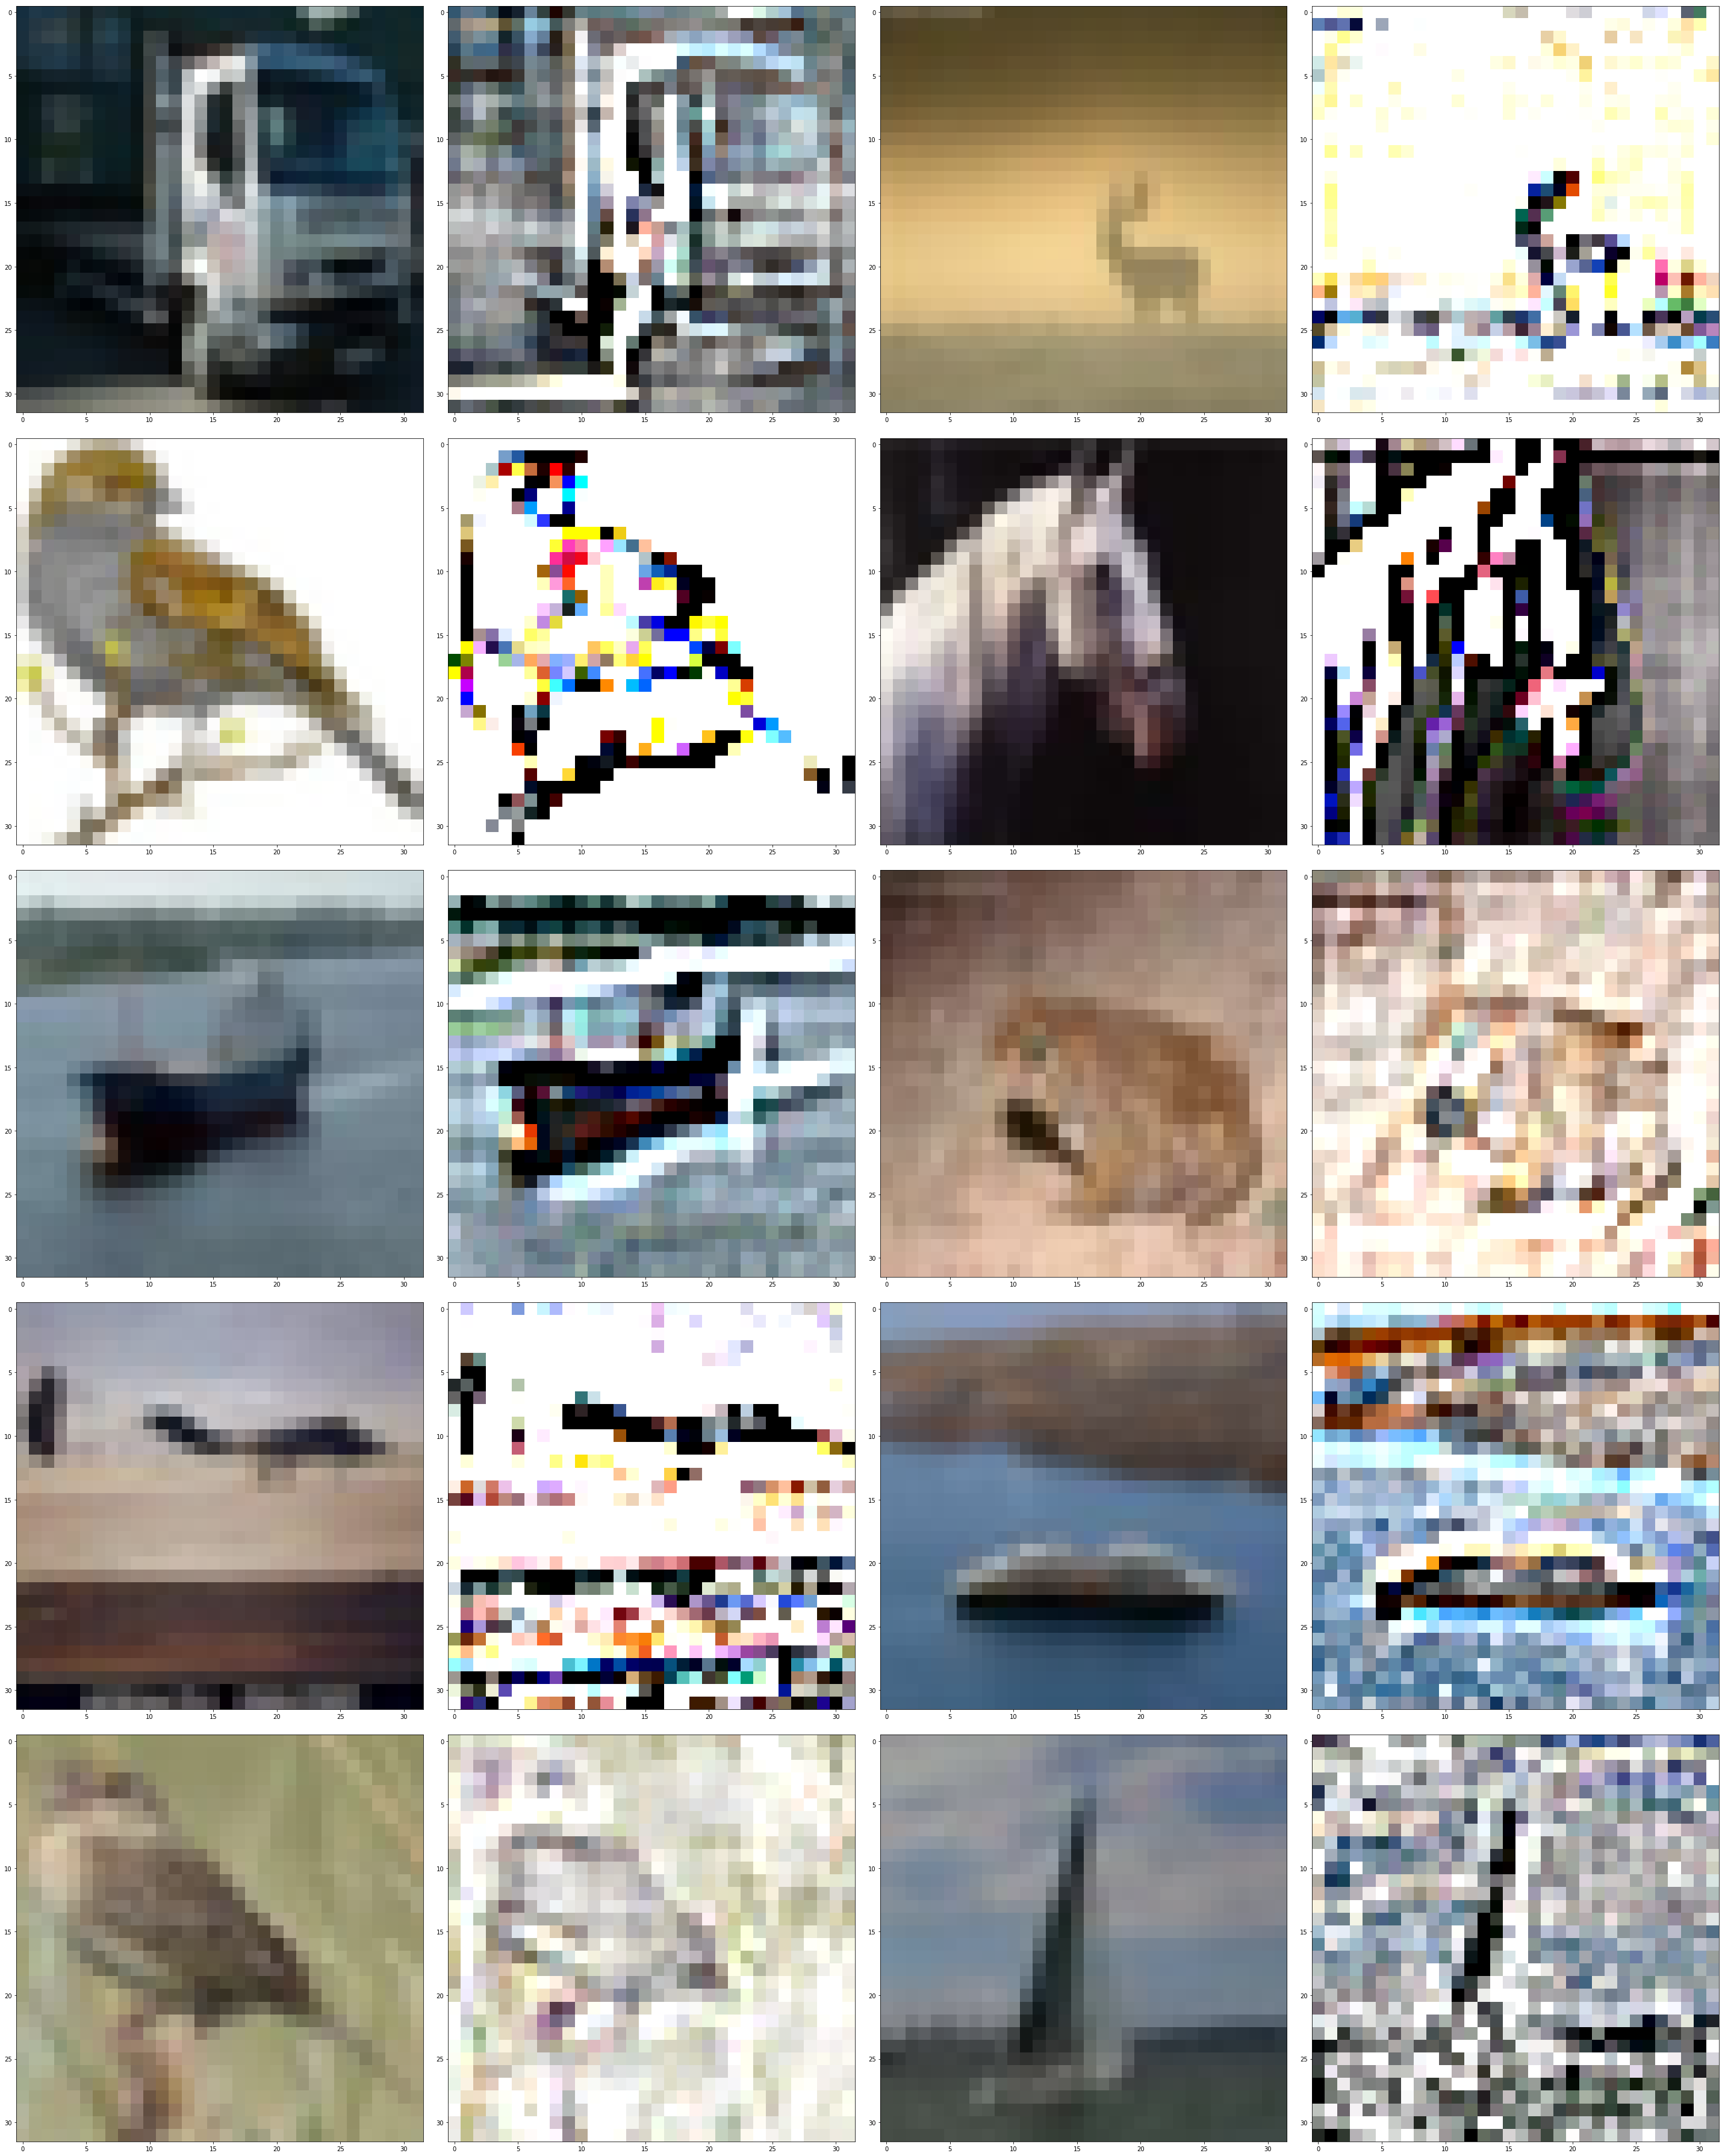

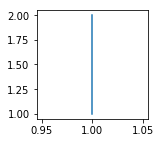

In [154]:
for i in non_overfitting_exp_df.drop_duplicates("trial_no").sort_values("reward", ascending=False).trial_no.values[:5]:
    print ("trial_no:",i)
    display_augmentation_by_trial_no(i, non_overfitting_exp_df, data, nrows=5, ncols=4)
    plt.figure(figsize=(2,2))
    plt.plot([1,1],[1,2])

In [153]:
non_overfitting_exp_df.drop_duplicates("trial_no").sort_values("reward",ascending=False)[:15]

,acc,loss,val_acc,val_loss,trial_no,aug1_type,aug1_magnitude,aug2_type,aug2_magnitude,aug3_type,aug3_magnitude,portion,sample_no,reward,acc_overfit,epoch,total_acc_overfit
4050,0.148,2.258,0.182,2.141,28,gaussian-blur,0.980,crop,0.379,brighten,0.916,0.980,1,0.548,-0.034,0.0,0.310
4200,0.094,2.309,0.155,2.298,29,invert,0.984,translate-y,0.374,shear,0.793,0.980,1,0.539,-0.061,0.0,1.187
1500,0.117,2.295,0.160,2.227,11,clouds,0.978,coarse-dropout,0.907,rotate,0.960,0.646,1,0.534,-0.043,0.0,3.271
5250,0.118,2.300,0.144,2.230,36,shear,0.984,gamma-contrast,0.682,brighten,0.852,0.970,1,0.533,-0.026,0.0,0.954
4950,0.131,2.292,0.107,2.273,34,emboss,0.986,clouds,0.583,sharpen,0.513,0.981,1,0.529,0.024,0.0,7.653
4500,0.136,2.295,0.127,2.247,31,coarse-dropout,0.990,fog,0.964,brighten,0.724,1.000,1,0.524,0.009,0.0,4.234
3150,0.133,2.289,0.150,2.232,22,crop,0.990,coarse-dropout,0.248,clouds,0.708,0.633,1,0.524,-0.017,0.0,2.960
3000,0.141,2.282,0.115,2.313,21,sharpen,0.972,coarse-dropout,0.197,clouds,0.760,0.865,1,0.523,0.026,0.0,10.514
1800,0.144,2.277,0.211,2.192,13,emboss,0.331,coarse-dropout,0.916,rotate,0.881,0.695,1,0.521,-0.067,0.0,5.824
3450,0.127,2.292,0.187,2.184,24,sharpen,0.951,emboss,0.559,rotate,0.968,0.997,1,0.521,-0.060,0.0,3.735


,trial_no,aug1_type,aug1_magnitude,aug2_type,aug2_magnitude,aug3_type,aug3_magnitude,portion,reward
1,28,gaussian-blur,0.980,crop,0.379,brighten,0.916,0.980,0.548
2,29,invert,0.984,translate-y,0.374,shear,0.793,0.980,0.539
0,11,clouds,0.978,coarse-dropout,0.907,rotate,0.960,0.646,0.534


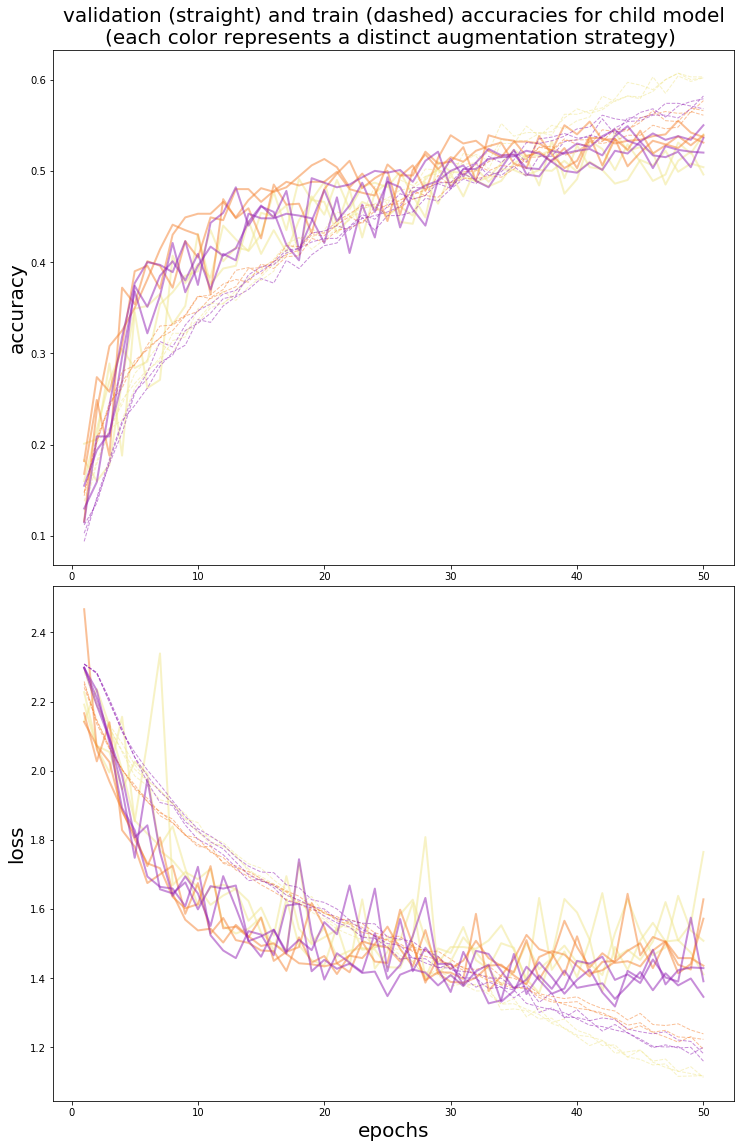

In [152]:
top3_non_overfitting = (non_overfitting_exp_df.drop_duplicates("trial_no")
                            .sort_values("reward",ascending=False)["trial_no"]
                            .values[:3]
                       )

plot_exp_lines(non_overfitting_exp_df[non_overfitting_exp_df["trial_no"].isin(top3_non_overfitting)])